<font size="10">REAL ESTATE DATA ANALYSIS: MELBOURNE



<font size="6.5">Scope of the project:


The scope of this study encompasses a comprehensive analysis of the Melbourne real estate market, as a hypothetical consulting commission coming from a real estate business, with a focus on understanding the primary determinants of property prices, identifying property groups with similar features, and uncovering potential hidden insights. To simulate a real case scenario, it has been chosen a to-be-cleaned, unknown dataset, where the most suitable procedures for the data are unknown. The analysis will particularly emphasize property types price differences and geographical regions based properties distinction.
In doing so, the study aims to achieve the following:

* **Identify Key Features**: Determine the key features that significantly influence property prices, providing valuable insights for buying and selling.

* **Segmentation of Property Groups**: Employ clustering techniques to identify distinct groups of properties that share common characteristics. This segmentation can enhance the understanding of market trends and preferences within specific property categories.

* **Typological Analysis**: Explore the impact of property features on property prices. This information can be crucial for both buyers and sellers seeking to understand the dynamics of different house types.

* **Predictive Modeling**: Develop predictive models for property prices, allowing for a nuanced understanding of how various features contribute to overall valuation. This predictive approach can aid in making informed decisions regarding property investments.

* **Visualization of Results**: Present the findings in visually compelling formats such as charts, graphs, and maps to facilitate a clear understanding of complex patterns and trends.

<font size="5">Importing the libraries:

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import torch.optim as optim
import torch.nn as nn
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import torch

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score, silhouette_samples
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.cluster.hierarchy import linkage, dendrogram
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from google.colab import drive
from tabulate import tabulate

drive.mount('/content/drive')

Mounted at /content/drive


<font size="5">Importing the data:</font>

In [2]:
zip_file_path = "/content/drive/MyDrive/My projects/Real Estate Data Analysis /Melbourne Housing Data.zip"
csv_file_name = "melb_data.csv"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_file_name) as file:
        # create a pandas dataframe with the file
        df = pd.read_csv(file)

# imposing to show all variables
pd.set_option('display.max_columns', None)
# generating a copy of the dataset to work on, so that the original data remains unchanged
df1 = df.copy()

The dataset used is the 'Melbourne Housing Snapshot' from Kaggle. It was scraped from publicly available results posted every week on Domain.com.au and contains information about over 14,000 real estate properties in Melbourne.

<font size="10">Data Exploration and Cleaning:</font>

<font size="5">Checking the dataset shape:

In [3]:
# checking the dataset shape
print(df1.shape[0])
print(df1.shape[1])

13580
21



The dataset adheres to the typical criterion of having a substantially greater number of rows compared to the number of variables. The aim is to maintain this condition even after the process of data exploration and cleaning.

<font size="5">Checking for duplicates:


In [4]:
duplicates = df1.duplicated(subset=None, keep='first')
num_duplicates = sum(duplicates)
print("Number of Duplicates:", num_duplicates)

Number of Duplicates: 0


The dataset presents no duplicates.

<font size="5">Checking the dataset variables:


In [5]:
print(df1.columns.tolist())

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


The available properties features are the following:

* **Suburb**: Suburb the house is in;
* **Address**: Address of the house;
* **Rooms**: Number of bedrooms;
* **Type**:  Type of house:  h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential;
* **Price**: Price ($);
* **Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available;
* **SellerG**: Real estate agent;
* **Date**: Date of sale;
* **Distance**: Distance from CBD (Central Business District);
* **Postcode**: Postcode;
* **Bedroom2**: Scraped number of bedrooms (from a different source);
* **Bathroom**: Number of bathrooms;
* **Car**: Number of car spots;
* **Landsize**: Land size (m2);
* **BuildingArea**: Building area size (m2);
* **YearBuilt**: Year of construction;
* **CouncilArea**: Governing council for the area;
* **Lattitude**: Geographical latitude;
* **Longtitude**: Geographical longitude;
* **Regionname**: General Region;
* **Propertycount**: Number of properties that exist in the suburb;

<font size="5"> Editing variables types:

In [6]:
# checking the types
print(df1.dtypes)

# changing the types according to personal considerations
df1['Suburb'] = df1['Suburb'].astype('string')
df1['Type'] = df1['Type'].astype('category')
df1['Method'] = df1['Method'].astype('category')
df1['SellerG'] = df1['SellerG'].astype('string')
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df1['Postcode'] = df1['Postcode'].astype('object')
df1['Bedroom2'] = df1['Bedroom2'].astype('Int64')
df1['Bathroom'] = df1['Bathroom'].astype('Int64')
df1['Car'] = df1['Car'].astype('Int64')
df1['Landsize'] = df1['Landsize'].astype('Int64')
df1['BuildingArea'] = df1['BuildingArea'].astype('float64')
df1['YearBuilt'] = df1['YearBuilt'].astype('Int64')
df1['CouncilArea'] = df1['CouncilArea'].astype('category')
df1['Regionname'] = df1['Regionname'].astype('category')
df1['Propertycount'] = df1['Propertycount'].astype('Int64')

print(' ')
print(df1.dtypes)

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object
 
Suburb                   string
Address                  object
Rooms                     int64
Type                   category
Price                   float64
Method                 category
SellerG                  string
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom2                  Int64
Bathroom                  Int64
Car                       Int64
Landsize                  Int64
BuildingAre

The reasons behind the choices made are these:

* **Suburb**: *object to string*, string type is more appropriate;
* **Address**: *object to object*, unchanged;
* **Rooms**: *int64 to int64*, unchanged;
* **Type**: *object to category*, category type is more appropriate;
* **Price**: *float64 to float64*, unchanged;
* **Method**: *object to category*, category type is more appropriate;
* **SellerG**: *object to string*, string type is more appropriate;
* **Date**: *object to datetime64[ns]*, datetime is more appropriate;
* **Distance**: *float64 to float64*, unchanged;
* **Postcode**: *float64 to object*, no use in considering postcodes as numbers;
* **Bedroom2**: *float64 to int64*, number of bedrooms is an integer;
* **Bathroom**: *float64 to int64*, number of bathrooms is an integer;
* **Car**: *float64 to int64*, number of car spots is an integer;
* **Landsize**: *float64 to int64*, the variable is reported with approximation to the closest integer;
* **BuildingArea**: *float64 to float64*, unchanged;
* **YearBuilt**: *float64 to int64*, year when the house has been built is an integer;
* **CouncilArea**: *object to category*, category type is more appropriate;
* **lattitue**: *float64 to float64*, unchanged;
* **Longtitude**: *float64 to float64*, unchanged;
* **Regionname**: *object to category*, category type is more appropriate;
* **Propertycount**: *float64 to int64*, number of houses is an integer;



<font size="5"> Missing data:

In [7]:
# creating a function to get insights about the missing data
def nan_info(dataframe):
    nan_counts = dataframe.isnull().sum()
    total_rows = len(dataframe)
    nan_percentages = nan_counts / total_rows * 100
    nan_columns = nan_counts[nan_counts > 0].index.tolist()

    print("NaN Information:")
    print("Total Rows:", total_rows)
    print("\nColumns with NaN values:")
    print(nan_columns)

    if nan_columns:
        print("\nNaN Counts:")
        print(nan_counts[nan_columns])

        print("\nNaN Percentages:")
        print(nan_percentages[nan_columns])

nan_info(df1)

NaN Information:
Total Rows: 13580

Columns with NaN values:
['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

NaN Counts:
Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64

NaN Percentages:
Car              0.456554
BuildingArea    47.496318
YearBuilt       39.580265
CouncilArea     10.081001
dtype: float64


<font size="5"> Editing the dataset:

In [8]:
# dropping rows with nan values
df1.dropna(subset=['BuildingArea'], inplace=True)
df1.dropna(subset=['Car'], inplace=True)

# dropping variables
df1.drop('Bedroom2', axis=1, inplace=True)
df1.drop('YearBuilt', axis=1, inplace=True)
df1.drop('CouncilArea', axis=1, inplace=True)
df1.drop('Lattitude', axis=1, inplace=True)
df1.drop('Longtitude', axis=1, inplace=True)

# changing the scale of the price variable
df1['Price'] = df1['Price']/1000

# Reset the index after dropping the rows
df1 = df1.reset_index(drop=True)

To address missing values, all rows with missing values for the BuildingArea variable were removed. Despite the significant reduction in dataset size, this decision was made due to the perceived importance of the BuildingArea variable for the project's objectives.

Rows with null values in the Car variable were also dropped, considering the relatively small impact on the dataset size.

The YearBuilt and CouncilArea variables were excluded due to their high ratio of null values compared to non-null values.

The bedroom2 variable was removed due to redundancy with the Rooms variable. The Latitude and Longitude variables were considered irrelevant to the project's scope.

The Price variable was scaled by dividing its values by 1000 for easier interpretation. It now represents the price of the house in thousands of dollars.


<font size="5"> Shape of the new dataset:

In [9]:
# printing the shape of the cleaned dataset
print(df1.shape[0])
print(df1.shape[1])

7101
16


<font size="5"> Renaming some variables:

In [10]:
# changing some names
to_rename = {"Rooms":"Bedrooms",
             "Type":"HouseType",
             "Price":"Price_(k)",
             "Method":"SaleMethod",
             "Date":"DateOfSale",
             "Distance":"DistanceCBD",
             "Car":"ParkingSpot"
             }
df1.rename(columns=to_rename, inplace=True)
df1.head()

,Suburb,Address,Bedrooms,HouseType,Price_(k),SaleMethod,SellerG,DateOfSale,DistanceCBD,Postcode,Bathroom,ParkingSpot,Landsize,BuildingArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035.0,S,Biggin,2016-02-04,2.5,3067.0,1,0,156,79.0,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,h,1465.0,SP,Biggin,2017-03-04,2.5,3067.0,2,0,134,150.0,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,h,1600.0,VB,Nelson,2016-06-04,2.5,3067.0,1,2,120,142.0,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,h,1876.0,S,Nelson,2016-05-07,2.5,3067.0,2,0,245,210.0,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,h,1636.0,S,Nelson,2016-10-08,2.5,3067.0,1,2,256,107.0,Northern Metropolitan,4019


The dataset has been subject to changes in variable names to improve clarity and appropriateness for the analysis.

<font size="10">Descriptive Statistics and Visualizations:
</font>

<font size="6.5"> General analysis:


<font size="5"> Basic statistics for numeric variables:

In [11]:
numeric_variables = df1.select_dtypes(include=['number'])

# Compute basic statistics for numeric variables
numeric_statistics = numeric_variables.describe().round(2)

# Calculate coefficient of variation (CV) and append to the statistics table
cv = (numeric_variables.std() / numeric_variables.mean()).round(2)
numeric_statistics.loc['cv'] = cv

table_numeric = tabulate(numeric_statistics, headers='keys', tablefmt='pretty')
print(table_numeric)

+-------+----------+-----------+-------------+----------+-------------+----------+--------------+---------------+
|       | Bedrooms | Price_(k) | DistanceCBD | Bathroom | ParkingSpot | Landsize | BuildingArea | Propertycount |
+-------+----------+-----------+-------------+----------+-------------+----------+--------------+---------------+
| count |  7101.0  |  7101.0   |   7101.0    |  7101.0  |   7101.0    |  7101.0  |    7101.0    |    7101.0     |
| mean  |   2.98   |  1078.63  |    10.17    |   1.6    |    1.61     |  490.25  |    152.13    |    7431.95    |
|  std  |   0.97   |  674.91   |    6.02     |   0.72   |    0.95     | 1038.24  |    542.11    |    4347.3     |
|  min  |   1.0    |   131.0   |     0.0     |   1.0    |     0.0     |   0.0    |     0.0      |     389.0     |
|  25%  |   2.0    |   630.0   |     6.1     |   1.0    |     1.0     |  165.0   |     93.0     |    4385.0     |
|  50%  |   3.0    |   890.5   |     9.2     |   1.0    |     2.0     |  401.0   |    12

<font size="5"> Histograms and Boxplots:




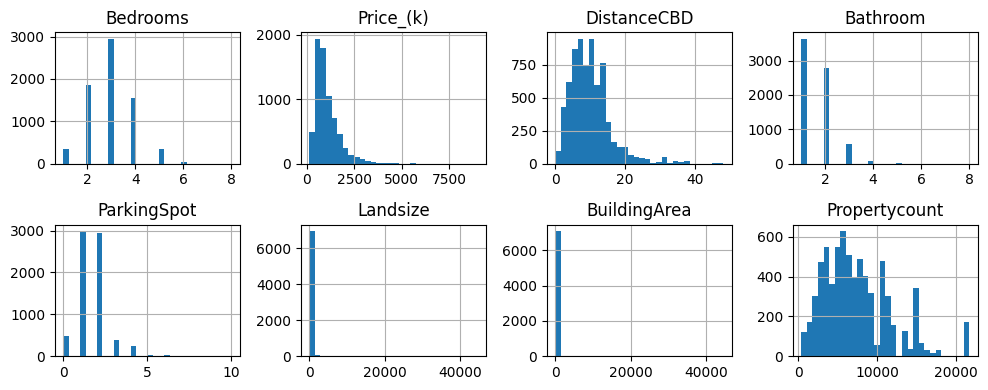

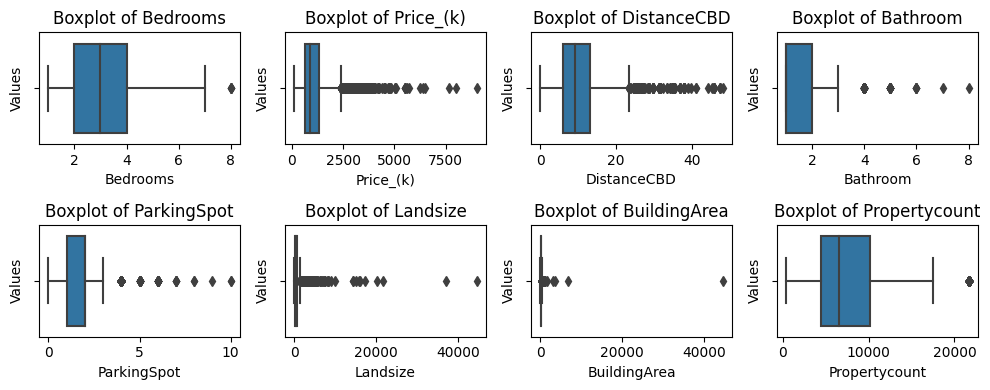

In [12]:
numeric_variable_names = numeric_variables.columns

# HISTOGRAMS
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 4))

axes = axes.flatten()

for i in range(8):
    numeric_variables[numeric_variable_names[i]].hist(bins=30, ax=axes[i])
    axes[i].set_title(numeric_variable_names[i])

plt.tight_layout()
plt.show()

# BOXPLOTS
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 4))

axes = axes.flatten()

for i, col in enumerate(numeric_variables.columns):
    ax = axes[i]
    sns.boxplot(x=df1[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()

<font size="5"> Data Cleaning:

In [13]:
# dropping some outliers
top_landsize_indices = df1['Landsize'].nlargest(12).index
df1 = df1.drop(top_landsize_indices)

top_BuildingArea_indices = df1['BuildingArea'].nlargest(4).index
df1 = df1.drop(top_BuildingArea_indices)

# dropping properties that have reported 0 as landsize or building Area
df1 = df1[(df1['Landsize'] != 0) & (df1['BuildingArea'] != 0)]

# Reset the index after dropping the rows
df1 = df1.reset_index(drop=True)

To enhance the accuracy of the analysis, properties with unusual features and those with unreported sizes (null values) have been excluded from the dataset. This ensures the reliability and robustness of the findings.



<font size="5"> New shape of the dataset:

In [14]:
# printing the shape of the cleaned dataset
print(df1.shape[0])
print(df1.shape[1])

6008
16


<font size="5"> Basic statistics for numeric variables:

In [15]:
numeric_variables = df1.select_dtypes(include=['number'])

# Compute basic statistics for numeric variables
numeric_statistics = numeric_variables.describe().round(2)

# Calculate coefficient of variation (CV) and append to the statistics table
cv = (numeric_variables.std() / numeric_variables.mean()).round(2)
numeric_statistics.loc['cv'] = cv

table_numeric = tabulate(numeric_statistics, headers='keys', tablefmt='pretty')
print(table_numeric)

+-------+----------+-----------+-------------+----------+-------------+----------+--------------+---------------+
|       | Bedrooms | Price_(k) | DistanceCBD | Bathroom | ParkingSpot | Landsize | BuildingArea | Propertycount |
+-------+----------+-----------+-------------+----------+-------------+----------+--------------+---------------+
| count |  6008.0  |  6008.0   |   6008.0    |  6008.0  |   6008.0    |  6008.0  |    6008.0    |    6008.0     |
| mean  |   3.15   |  1157.31  |    10.82    |   1.66   |    1.69     |  538.18  |    155.04    |    7268.52    |
|  std  |   0.9    |  688.62   |    6.08     |   0.74   |    0.98     |  541.61  |    85.05     |    4355.49    |
|  min  |   1.0    |   131.0   |     0.0     |   1.0    |     0.0     |   1.0    |     1.0      |     389.0     |
|  25%  |   3.0    |   702.0   |     6.9     |   1.0    |     1.0     |  258.0   |    105.0     |    4019.0     |
|  50%  |   3.0    |   966.0   |    10.1     |   2.0    |     2.0     |  505.0   |    13

<font size="5"> Histograms and Boxplots:


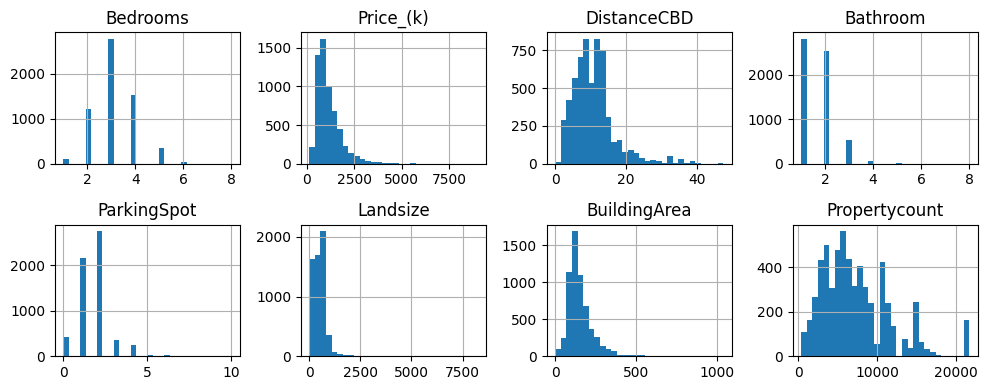

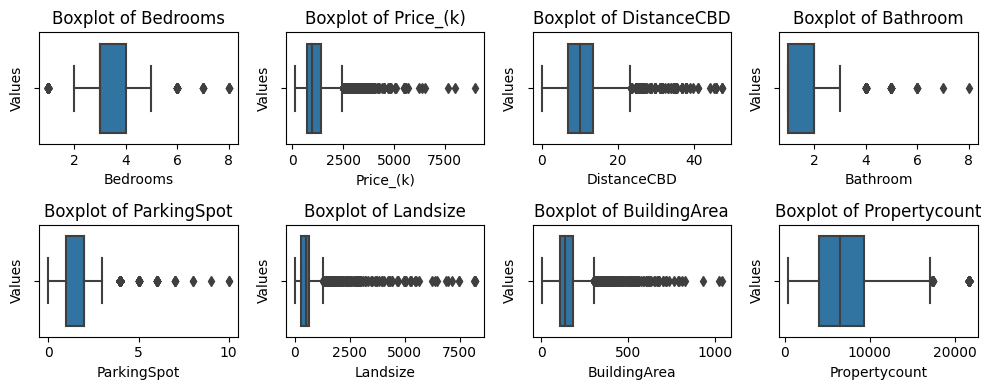

In [16]:
numeric_variable_names = numeric_variables.columns

# HISTOGRAMS
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 4))

axes = axes.flatten()

for i in range(8):
    numeric_variables[numeric_variable_names[i]].hist(bins=30, ax=axes[i])
    axes[i].set_title(numeric_variable_names[i])

plt.tight_layout()
plt.show()

# BOXPLOTS
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 4))

axes = axes.flatten()

for i, col in enumerate(numeric_variables.columns):
    ax = axes[i]
    sns.boxplot(x=df1[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()

The distributions exhibit a right-skewed pattern, suggesting that a majority of properties have relatively typical characteristics. However, there is a subset of exceptional elements with noteworthy features that elevate the mean values in comparison to the median. This indicates the presence of a few standout houses among a larger number of properties that exhibit more typical characteristics. The price distribution is among the most heavily skewed ones; this might be reflected in additional challenges during the price prediction.

<font size="5"> Bar charts for categorical variables:

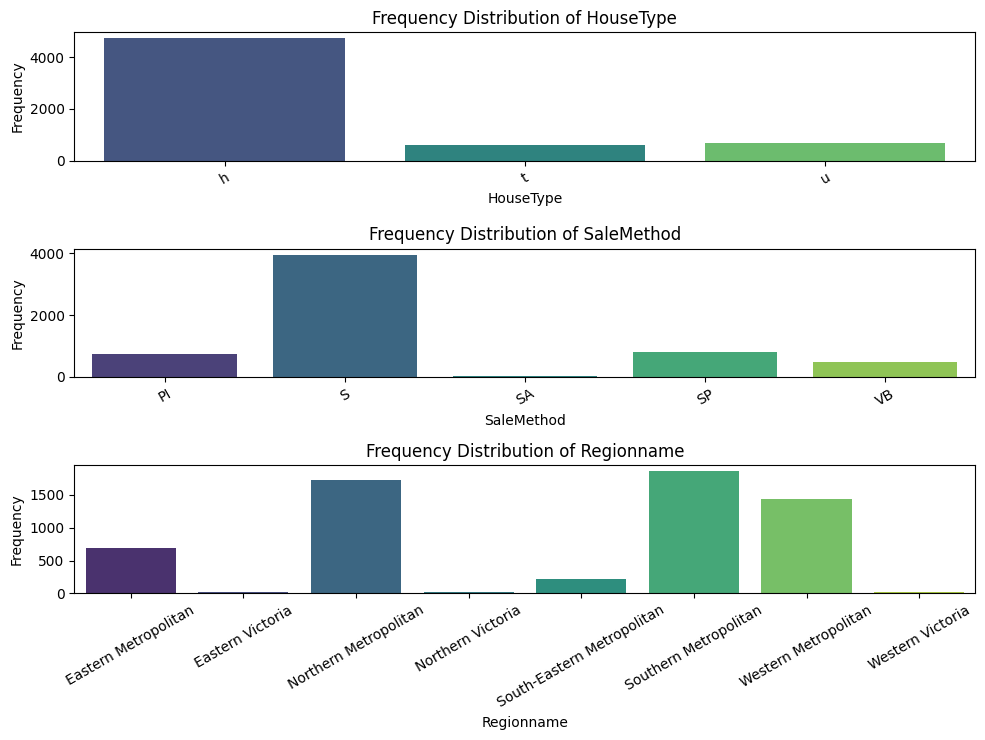

In [17]:
# categorical variables
categorical_variables = ['HouseType', 'SaleMethod', 'Regionname']

fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(10, 2.5 * len(categorical_variables)))

# BAR CHARTS
for i, var in enumerate(categorical_variables):
    ax = axes[i]
    sns.countplot(x=var, data=df1, ax=ax, palette='viridis')
    ax.set_title(f'Frequency Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()


The prevalent property type is the house (h), surpassing the combined count of the other two types. Regular sales (S) dominate as the most frequent sales type, exceeding the total count of all other sale types. The Southern Metropolitan and Northern Metropolitan regions stand out as the two most common, with the first one counting more properties than the second one, while all Victoria regions are heavily under-represented.







<font size="5"> Correlation matrix:

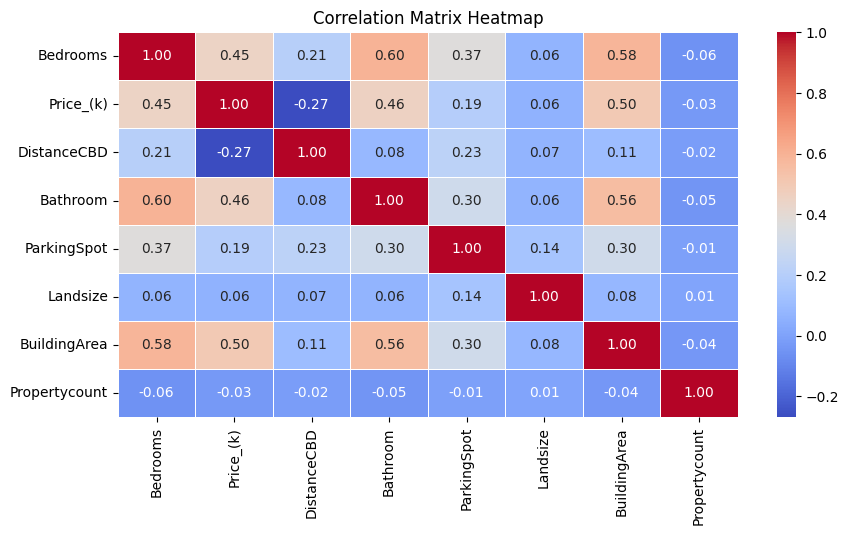

In [18]:
# correlation matrix
correlation_matrix = df1.corr(numeric_only=True)

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix shows no strong negative connections between variable pairs, suggesting no clear trend where one house feature decreases as another increases. Notably, variables like the number of bedrooms, building area, and bathrooms show relatively higher correlations. In particular, the strongest associations are between the number of bedrooms and both the building area (0.62) and the number of bathrooms (0.61). This indicates that larger properties tend to have more bedrooms, and those with more bedrooms often have more bathrooms, which aligns with common expectations.

<font size="6.5">Insights on house types:


<font size="5">Price variations for house types over time:


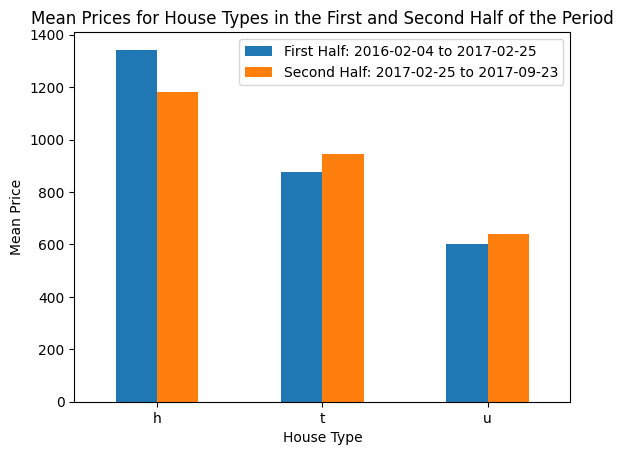

In [19]:
dft = df1.copy()
dft['DateOfSale'] = pd.to_datetime(dft['DateOfSale'])

dft = dft.sort_values('DateOfSale')
median_date = dft['DateOfSale'].median()
dft['Half_Period'] = dft['DateOfSale'].apply(lambda x: 'First Half' if x <= median_date else 'Second Half')

mean_prices = dft.groupby(['HouseType', 'Half_Period'])['Price_(k)'].mean().reset_index()

mean_prices_pivot = mean_prices.pivot(index='HouseType', columns='Half_Period', values='Price_(k)')

# graph
ax = mean_prices_pivot.plot(kind='bar', rot=0)
plt.title('Mean Prices for House Types in the First and Second Half of the Period')
plt.xlabel('House Type')
plt.ylabel('Mean Price')

first_half_start = dft[dft['Half_Period'] == 'First Half']['DateOfSale'].min()
first_half_end = median_date
second_half_start = median_date
second_half_end = dft[dft['Half_Period'] == 'Second Half']['DateOfSale'].max()

legend_labels = [f'First Half: {first_half_start.strftime("%Y-%m-%d")} to {first_half_end.strftime("%Y-%m-%d")}',
                 f'Second Half: {second_half_start.strftime("%Y-%m-%d")} to {second_half_end.strftime("%Y-%m-%d")}']

ax.legend(legend_labels, loc='upper right')
plt.show()

Properties classified as "house" (and similar) types exhibit the highest average price, followed by townhouses (and similar), and then by units and duplexes. Notably, houses stand out as the only category experiencing a decline in prices during the second half of the sales period.

(Note: Halves are determined by the number of properties sold, not by days.)

<font size="5"> Price distribution for house types:


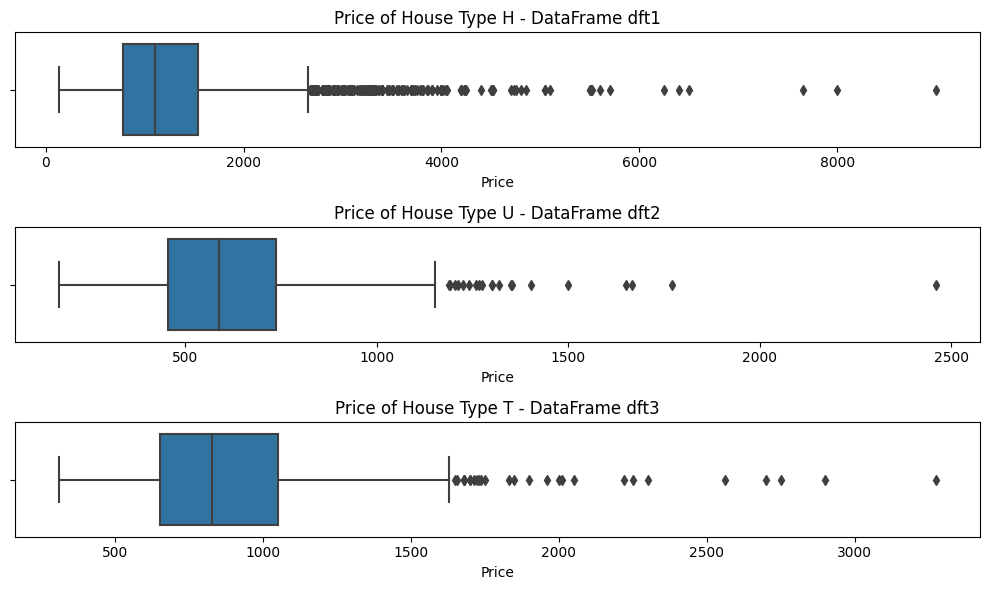

In [20]:
dft = df1.copy()
dft1 = dft[dft['HouseType'] == 'h']
dft2 = dft[dft['HouseType'] == 'u']
dft3 = dft[dft['HouseType'] == 't']

fig, axes = plt.subplots(3, 1, figsize=(10, 6))

# Boxplot for houses and similar
sns.boxplot(x='Price_(k)', data=dft1, ax=axes[0], orient='h')
axes[0].set_title('Price of House Type H - DataFrame dft1')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('')

# Boxplot for units and duplexes
sns.boxplot(x='Price_(k)', data=dft2, ax=axes[1], orient='h')
axes[1].set_title('Price of House Type U - DataFrame dft2')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('')

# Boxplot for townhouses and similar
sns.boxplot(x='Price_(k)', data=dft3, ax=axes[2], orient='h')
axes[2].set_title('Price of House Type T - DataFrame dft3')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


The group presenting the most unusual property is the houses one, followed by the townhouses one, then by the units. This might have an impact later on during the price estimation based on the house type.

<font size="6.5">Insights on Melbourne's regions:


<font size="5">Data preparation:


In [21]:
dfr = df1.copy()
dfr1 = dfr[dfr['Regionname'] == 'Northern Metropolitan']
dfr2 = dfr[dfr['Regionname'] == 'Western Metropolitan']
dfr3 = dfr[dfr['Regionname'] == 'Southern Metropolitan']
dfr4 = dfr[dfr['Regionname'] == 'Eastern Metropolitan']
dfr5 = dfr[dfr['Regionname'] == 'South-Eastern Metropolitan']
dfr6 = dfr[dfr['Regionname'] == 'Northern Victoria']
dfr7 = dfr[dfr['Regionname'] == 'Eastern Victoria']
dfr8 = dfr[dfr['Regionname'] == 'Western Victoria']
dataset_names = ['dfr1', 'dfr2', 'dfr3', 'dfr4', 'dfr5', 'dfr6', 'dfr7', 'dfr8']

<font size="5">Caegorical features rappresentation per region:



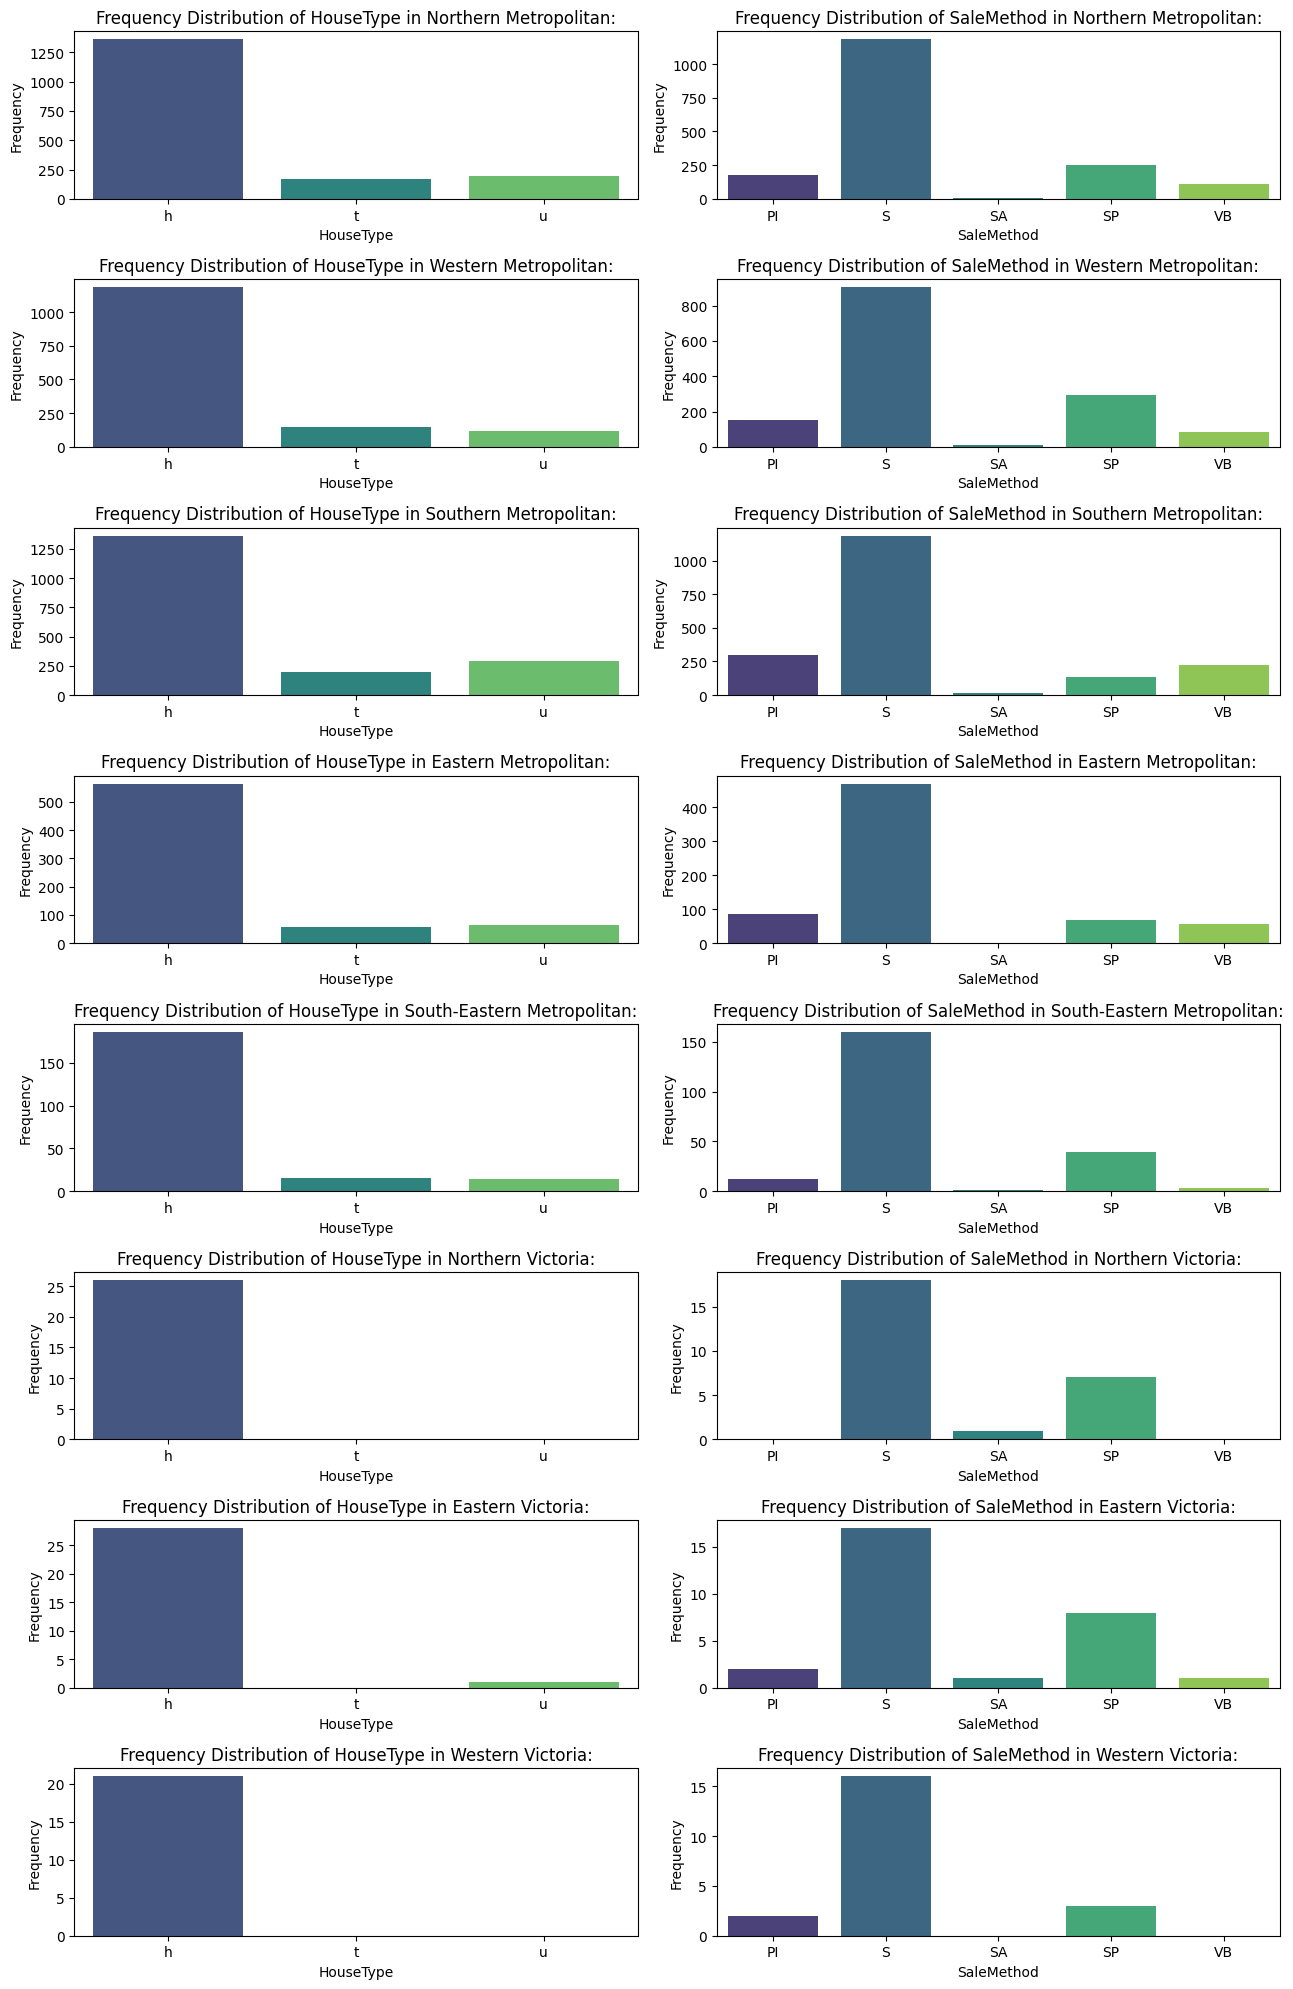

In [22]:
categorical_variables = ['HouseType', 'SaleMethod']

fig, axes = plt.subplots(nrows=len(dataset_names), ncols=len(categorical_variables), figsize=(13, 2.5*len(dataset_names)))

for i, df in enumerate(dataset_names):
    ds = globals()[df]
    for j, var in enumerate(categorical_variables):
      region = ds.iloc[1]['Regionname']
      ax = axes[i,j]
      sns.countplot(x=var, data=ds, ax=ax, palette='viridis')
      ax.set_title(f'Frequency Distribution of {var} in {str(region)}:')
      ax.set_xlabel(var)
      ax.set_ylabel('Frequency')
      ax.tick_params(axis='x')

plt.tight_layout()
plt.show()

Regarding the type of property per region, the distributions are all generally balanced, meaning that house type is the most dominant everywhere, and townhouses and units are fairly represented as minor quotas in all regions, with exceptions made for the 3 least represented regions (all Victoria regions count less than 30 properties), where they are virtually absent. The sale method does not seem to be changing much depending on the region of the property, and it too follows the distribution of the general  dataset.

<font size="5">Basic statistics for numeric variables based on the region:


In [23]:
print("Overall statistics:")
print(table_numeric)

for dataset_name in dataset_names:
  current_dataset = globals()[dataset_name]
  region = current_dataset.iloc[1]['Regionname']
  numeric_variables = current_dataset.select_dtypes(include=['number'])
  numeric_statistics = numeric_variables.describe().round(2)
  cv = (numeric_variables.std() / numeric_variables.mean()).round(2)
  numeric_statistics.loc['cv'] = cv
  table_numeric = tabulate(numeric_statistics, headers='keys', tablefmt='pretty')
  print("statistics for", region, ":")
  print(table_numeric)
  print("")

Overall statistics:
+-------+----------+-----------+-------------+----------+-------------+----------+--------------+---------------+
|       | Bedrooms | Price_(k) | DistanceCBD | Bathroom | ParkingSpot | Landsize | BuildingArea | Propertycount |
+-------+----------+-----------+-------------+----------+-------------+----------+--------------+---------------+
| count |  6008.0  |  6008.0   |   6008.0    |  6008.0  |   6008.0    |  6008.0  |    6008.0    |    6008.0     |
| mean  |   3.15   |  1157.31  |    10.82    |   1.66   |    1.69     |  538.18  |    155.04    |    7268.52    |
|  std  |   0.9    |  688.62   |    6.08     |   0.74   |    0.98     |  541.61  |    85.05     |    4355.49    |
|  min  |   1.0    |   131.0   |     0.0     |   1.0    |     0.0     |   1.0    |     1.0      |     389.0     |
|  25%  |   3.0    |   702.0   |     6.9     |   1.0    |     1.0     |  258.0   |    105.0     |    4019.0     |
|  50%  |   3.0    |   966.0   |    10.1     |   2.0    |     2.0   

* **Northern Metropolitan** properties seem to include a moderate number of bedrooms and bathrooms, yet with a balanced distribution of land size and building area. The mean price is slightly lower than the overall properties' mean price.
* **Western Metropolitan** region properties stand out for having the highest mean property count, suggesting it may represent properties in more populated areas. The average price is moderate and so is the building size.
* **Southern Metropolitan** properties are higher-end properties with larger land size and building areas. The average price is the highest among the regions, indicating a focus on premium real estate.
* **Eastern Metropolitan** properties tend to have relatively high average number of bedrooms, bathrooms, and parking spots and, indeed, larger land size and building areas, suggesting more spacious accommodations. Though, prices are in line with the overall properties, this might be linked with a slightly higher mean distance from the CBD.
* **South-Eastern Metropolitan** region properties have a high average distance to the CBD, indicating suburban or more distant locations. The average price is moderate, yet the properties have a reasonable number of bedrooms and bathrooms.
* **Southern Victoria** region is underrepresented in these data, therefor information coming from this analysis might not be scaled properly to the neighborhood. Properties with larger land size and building areas are included. The average distance to the CBD is the highest among the regions, indicating more remote locations.
* **Eastern Victoria** properties have a high average land size and building area, suggesting larger accommodations. The average distance to the CBD is also high. The region is underrepresented.
* **Western Victoria** region properties include houses with a moderate number of bedrooms and bathrooms. The average distance to the CBD is relatively high, similar to Southern Victoria and Eastern Victoria. Again, the number of properties in this region is very small suggesting that the whole Victoria region is heavily underrepresented.

<font size="10">Feature Engineering:

</font>

<font size="5">New feature generation:

In [24]:
# creating a copy on the working dataset to work on a new, different, feature
df2 = df1.copy()

# creating the new feature
df2['Price_m2'] = df2['Price_(k)'] / df2['BuildingArea']
df2['Price_m2'] = df2['Price_m2'].astype('float64')

A new feature has been generated: Price (thousands of dollars) per squared meter. This is because it has been chosen to create two different models: one to predict the price of the house, and one to predict the price related to the house surface; as a second model could bring different advantages, like:

* **Spatial Efficiency Insights**:
It provides specific insights into the spatial efficiency and value of the property relative to its size.
* **Standardized Comparison**:
It allows for a standardized comparison across properties of different sizes.
* **Focus on Key Features**:
By excluding the area from the features, the focus can be shifted to other key factors that contribute to the spatial efficiency of the property. This may lead to a more nuanced understanding of how certain features impact the price per square meter.

<font size="5"> Price per squared meter basic statistics:

In [25]:
# statistics for the new price per squared meter feature
statistics = df2['Price_m2'].describe()

# Calculate the Coefficient of Variation (CV)
cv = df2['Price_m2'].std() / df2['Price_m2'].mean()

statistics['CV'] = cv
print(statistics.round(2))

count    6008.00
mean       11.76
std        63.83
min         0.62
25%         5.50
50%         7.37
75%         9.62
max      3812.00
CV          5.43
Name: Price_m2, dtype: float64


<font size="5"> Price per squared meter histaogram and boxplot:

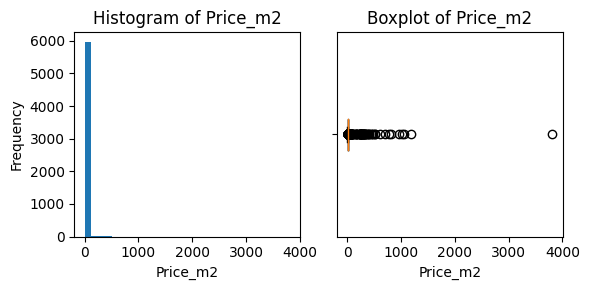

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# HISTOGRAM
axes[0].hist(df2['Price_m2'], bins=30)
axes[0].set_title('Histogram of Price_m2')
axes[0].set_xlabel('Price_m2')
axes[0].set_ylabel('Frequency')

# BOXPLOT
axes[1].boxplot(df2['Price_m2'], vert=False)
axes[1].set_title('Boxplot of Price_m2')
axes[1].set_xlabel('Price_m2')
axes[1].set_yticklabels([])

plt.tight_layout()
plt.show()

<font size="5"> Data Cleaning:

In [27]:
# removing the most evident outliers
top_Pricem2_indices = df2['Price_m2'].nlargest(47).index
df2 = df2.drop(top_Pricem2_indices)

df2.drop('Price_(k)', axis=1, inplace=True)
df2.drop('BuildingArea', axis=1, inplace=True)

# resetting the index
df2 = df2.reset_index(drop=True)

47 properties have been removed from the dataset due to their very unique  price per squared meter. The price per squared meter distribution still includes some peculiar elements. The reason behind their removal is the assumption that their price is potentially determined by some very specific features that go far over the head of the available data for the project.

Variables Price and Building area have been removed from the dataset because of their direct involvement in the price per squared meter feature.

<font size="5"> Price per squared meter basic statistics:

In [28]:
numeric_variables = df2.select_dtypes(include=['number'])

# Compute basic statistics for numeric variables
numeric_statistics = numeric_variables.describe().round(2)

# Calculate coefficient of variation (CV) and append to the statistics table
cv = (numeric_variables.std() / numeric_variables.mean()).round(2)
numeric_statistics.loc['cv'] = cv

table_numeric = tabulate(numeric_statistics, headers='keys', tablefmt='pretty')
print(table_numeric)

+-------+----------+-------------+----------+-------------+----------+---------------+----------+
|       | Bedrooms | DistanceCBD | Bathroom | ParkingSpot | Landsize | Propertycount | Price_m2 |
+-------+----------+-------------+----------+-------------+----------+---------------+----------+
| count |  5961.0  |   5961.0    |  5961.0  |   5961.0    |  5961.0  |    5961.0     |  5961.0  |
| mean  |   3.16   |    10.83    |   1.66   |    1.69     |  539.66  |    7262.24    |   8.14   |
|  std  |   0.9    |     6.1     |   0.74   |    0.98     |  542.06  |    4353.02    |   5.32   |
|  min  |   1.0    |     0.0     |   1.0    |     0.0     |   1.0    |     389.0     |   0.62   |
|  25%  |   3.0    |     6.9     |   1.0    |     1.0     |  261.0   |    4019.0     |   5.48   |
|  50%  |   3.0    |    10.1     |   2.0    |     2.0     |  508.0   |    6388.0     |   7.33   |
|  75%  |   4.0    |    13.5     |   2.0    |     2.0     |  663.0   |    9264.0     |   9.55   |
|  max  |   8.0    |

The reason why now all variables statistics have been printed again is because additional properties have been removed from the data, this might have had effects on the features statistics.

<font size="5"> Price per squared meter histaogram and boxplot:

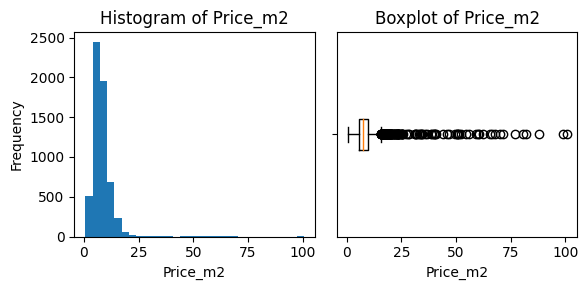

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# HISTOGRAM
axes[0].hist(df2['Price_m2'], bins=30)
axes[0].set_title('Histogram of Price_m2')
axes[0].set_xlabel('Price_m2')
axes[0].set_ylabel('Frequency')

# BOXPLOT
axes[1].boxplot(df2['Price_m2'], vert=False)
axes[1].set_title('Boxplot of Price_m2')
axes[1].set_xlabel('Price_m2')
axes[1].set_yticklabels([])

plt.tight_layout()
plt.show()

Regardless of the removal of properties with extremely unlikely prices per square meters, the distribution of the feature seems to be very variable, probably because of the presence of some relatively small houses with particularly high prices. Still, the coefficient of variance of the newly generated feature  remains the highest of them all except for the land size one, meaning the distribution of the price per squared meter is definitely variable.

<font size="5"> Shape of the second dataset:

In [30]:
# printing the shape of the cleaned dataset
print(df2.shape[0])
print(df2.shape[1])

5961
15


<font size="10"> Principal component analysis:

It is now attempted the adoption of a PCA (principal component analysis) procedure to try to synthesize relationships among informative features through the definition of ad hoc indices which will generate a simpler model that will retain as much information as possible. Features are going to be standardized since most features are expressed with different units of measure. This will allow ease of representation and impactful information, with extra attention dedicated to the geographical position of the properties. If this approach will be a success, it will be taken into consideration to perform some of the upcoming procedures on the synthesize data.

<font size="5"> Data preparation:

In [31]:
geographical_var = "Regionname"
variables_to_drop = df1.select_dtypes(exclude=['number'])
x = df1.drop(variables_to_drop, axis=1)
x["Regionname"] = df1["Regionname"]
X = x.drop(geographical_var, axis=1)

# data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<font size="5"> Performing the PCA:

In [32]:
# using the pca method
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

All components have been taken to get to look at the whole model.

<font size="5"> Components selection:

Eigenvalues of Principal Components:
[2.80649564 1.29998172 1.01240928 0.96686711 0.70119114 0.46008607
 0.39552811 0.35877271]

Explained variance ratio:
[0.35075356 0.16247067 0.1265301  0.12083827 0.0876343  0.05750119
 0.04943278 0.04483912]

Cumulative explained variance:
[0.35075356 0.51322423 0.63975433 0.7605926  0.8482269  0.90572809
 0.95516088 1.        ]



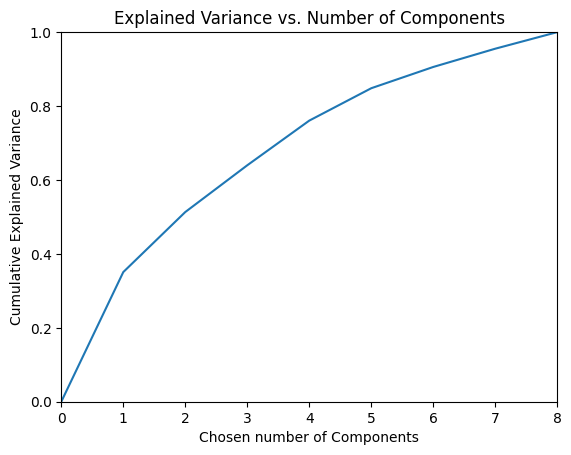

In [33]:
# eigenvalues
eigenvalues = pca.explained_variance_
print("Eigenvalues of Principal Components:")
print(eigenvalues)
print("")

# variance explained by the components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:")
print(explained_variance_ratio)
print("")

# cumulative variance explained by the components
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:")
print(cumulative_explained_variance)
print("")

# plotting the cumulative variance
cev = np.insert(cumulative_explained_variance, 0, 0)
plt.plot(cev)
plt.ylim(0, 1)
plt.xlim(0, 8)
plt.xlabel('Chosen number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

The method of the eigenvalue greater than 1 suggests taking the first 3 principal components, providing a model that would explain about 63% of the original information. Nevertheless, taking an additional component can be beneficial in order to grasp additional information (additional 12%) throught the model, which already seems to be mediocre. The graph shows how there is no obvious optimal "elbow point" to indicate the best number of components to consider, and also how the first few components do not exceptionally surpass the following ones in terms of variance explained.

<font size="5"> Feature consideartion:

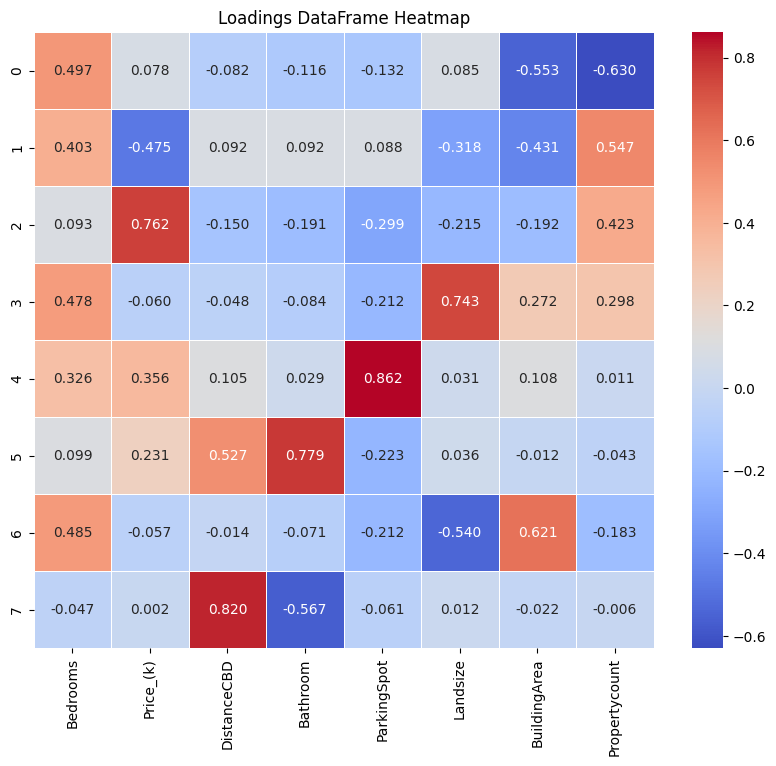

In [34]:
loadings = pca.components_
columns = X.columns
loadings_df = pd.DataFrame(loadings.T, columns=columns)

pd.set_option('display.float_format', '{:.3f}'.format)
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Loadings DataFrame Heatmap')
plt.show()

By analyzing the heatmap above it is possible to interpret how much and how the principal components take into consideration the original features. Unfortunately, it looks like the first principal components fail to properly consider all features, and actually they do not even go near that: every principal component properly represents one, or even zero, original features, which is very bad, as they can not be considered synthetic indexes of the Melbourne real estate market (at least for the available data).

<font size="5"> Model application:

In [35]:
num_components = 4
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(explained_variance_ratio)
print(cumulative_explained_variance)

[0.35075356 0.16247067 0.1265301  0.12083827]
[0.35075356 0.51322423 0.63975433 0.7605926 ]


The pca dataset is generated anyway, considering the first 4 principal components.

<font size="6.5"> Conclusions:

The principal component analysis did not give the hoped results. Dimensional reduction can be hard with such a magnitude of features (8), and in this case the space-saved trad-off with the information retained can not be considered optimal. The second reason why the PCA has been performed, which was the intention of generating synthetic indexes of properties characteristics, did not work well either. The main principal components were not properly taking into account all the features, so the model generated ended up losing track of some aspects that were therefore getting totally lost in the PCA data (this is related to the relatively low difference in explained variance between a given component and the following one).
The geographical comparison based on the region of the property will not be performed.

<font size="10">Linear Regression for price prediction:

</font>

The initial step in developing a predictive analytical tool for property prices involves employing a multiple linear regression model. This model considers the linear connections among various features to predict property prices based on the values of those specific features.







<font size="6.5"> Price for all properties:

<font size="5"> First model:

In [36]:
# training and test data generation
target_variable = 'Price_(k)'
variables_to_drop = df1.select_dtypes(exclude=['number'])

X = df1.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
y = df1[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data (for the intercept of the model)
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit()


# computing the VIF values for the features (Variance Inflation Factor)
X_for_vif = X_train_scaled_with_constant[:, 1:]
column_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(model.summary())

  Variable   VIF
0       x1 1.954
1       x2 1.081
2       x3 1.739
3       x4 1.243
4       x5 1.023
5       x6 1.714
6       x7 1.005
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     612.6
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:28:14   Log-Likelihood:                -41385.
No. Observations:                5407   AIC:                         8.279e+04
Df Residuals:                    5399   BIC:                         8.284e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

<font size="5"> Checking for homoscedasticity:

After creating the initial model, the first task is to assess whether the assumption of homoscedasticity is met. Depending on the findings, the model may need adjustments or modifications to address any issues identified.

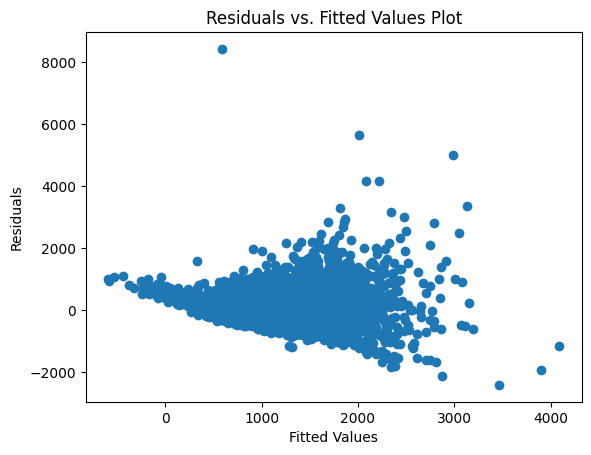

In [37]:
# Residuals vs. Fitted Values Plot
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.show()

The homoscedasticity condition is not adequately satisfied, as the residual distribution does not seem to be random. It seems that the residuals vary across a wider range as the fitted values increase. Due to this reason, a robust model shall be adopted to account for the presence of heteroscedasticity.

<font size="5"> Second model (robust):

In [38]:
robust_model = sm.OLS(y_train, X_train_scaled_with_constant).fit(cov_type='HC3')

# Print the summary of the model with robust standard errors and VIF values
print(vif_data)
print(robust_model.summary())

  Variable   VIF
0       x1 1.954
1       x2 1.081
2       x3 1.739
3       x4 1.243
4       x5 1.023
5       x6 1.714
6       x7 1.005
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     254.7
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:28:15   Log-Likelihood:                -41385.
No. Observations:                5407   AIC:                         8.279e+04
Df Residuals:                    5399   BIC:                         8.284e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.

This model is robust, accounting for heteroscedasticity in the residuals. VIF values are all very low, indicating no need to eliminate any features due to multicollinearity. Now, attention should shift to the z-test (instead of the t-test, given the use of a robust model). Features with a high p-value in the test are considered irrelevant for model generation and can be safely removed with minimal repercussions. The only feature in this model that appears to lack a purpose is the number of properties in the suburb, which will be removed. Subsequently, the model will be re-estimated.

<font size="5"> Third model (removed low impact features):

In [39]:
# training and test data generation
target_variable = 'Price_(k)'
variables_to_drop = df1.select_dtypes(exclude=['number'])

failed_ttest = 'Propertycount'
X = df1.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
X = X.drop(failed_ttest, axis=1)
y = df1[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
robust_model = sm.OLS(y_train, X_train_scaled_with_constant).fit(cov_type='HC3')

X_for_vif = X_train_scaled_with_constant[:, 1:]  # Exclude the first column (constant term)

column_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(robust_model.summary())

  Variable   VIF
0       x1 1.951
1       x2 1.081
2       x3 1.739
3       x4 1.243
4       x5 1.022
5       x6 1.714
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     296.8
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:28:16   Log-Likelihood:                -41385.
No. Observations:                5407   AIC:                         8.278e+04
Df Residuals:                    5400   BIC:                         8.283e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------

The model now consists of only relevant and sufficiently independent features. However, before evaluating the results, it is appropriate to check for any particularly influential property that might have a bit too much impact on the model parameters. To do so, the D-cook values for the properties need to be checked.

<font size="5"> Checking for excessively impactful properties:

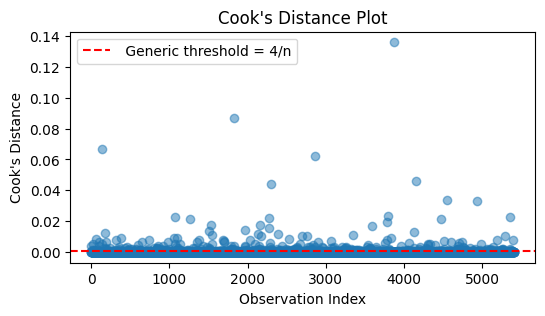

In [40]:
influence = OLSInfluence(robust_model)
cooks_distance = influence.cooks_distance
cooks_distance_df = pd.DataFrame({'Cook\'s Distance': cooks_distance[0]})

# Scatter plot of Cook's distance
plt.figure(figsize=(6, 3))
plt.scatter(range(len(cooks_distance_df)), cooks_distance_df['Cook\'s Distance'], alpha=0.5)
plt.axhline(y=4 / len(X_train), color='r', linestyle='--', label=' Generic threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.legend()
plt.show()

Many properties exhibit values exceeding the generic threshold of 4 divided by the number of properties, but this is not uncommon in larger datasets. However, due to the abundance of units, the removal of some of the most influential properties from the model might be considered, aiming for increased stability.

<font size="5"> Fourth model (removed the most influencial properties):



In [41]:
# training and test data generation
df10 = df1.copy()
df10['Cook\'s Distance'] = cooks_distance_df['Cook\'s Distance']
top_Dcooks_indices = df10['Cook\'s Distance'].nlargest(2).index
df10 = df10.drop(top_Dcooks_indices)
dcook_drop = 'Cook\'s Distance'
df10 = df10.drop(dcook_drop, axis=1)

target_variable = 'Price_(k)'
variables_to_drop = df10.select_dtypes(exclude=['number'])
failed_ttest = 'Propertycount'
X = df10.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
X = X.drop(failed_ttest, axis=1)
y = df10[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
robust_model = sm.OLS(y_train, X_train_scaled_with_constant).fit(cov_type='HC3')

X_for_vif = X_train_scaled_with_constant[:, 1:]  # Exclude the first column (constant term)

column_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model
print(vif_data)
print(robust_model.summary())
std_dev_variables = X_train[X_train.columns[robust_model.pvalues[1:] < 0.05]].std()
print("Significative features std dev:")
print(std_dev_variables)
std_dev_y = y_train.std()
print("Price std dev:", std_dev_y)

  Variable   VIF
0       x1 1.936
1       x2 1.080
2       x3 1.721
3       x4 1.241
4       x5 1.026
5       x6 1.696
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     303.8
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:28:21   Log-Likelihood:                -41384.
No. Observations:                5405   AIC:                         8.278e+04
Df Residuals:                    5398   BIC:                         8.283e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------

The final model has been established, elucidating approximately 44% of the variance in Melbourne property prices. While this level of explanatory power might be considered acceptable, it definietly falls short of being considered great. According to the model, property prices are estimated based on seven values: six property features and a constant term.

Positive correlations exist between the price of a property and the number of bedrooms, bathrooms, parking spots, land size, and building area. This implies that an increase in any of these features is associated with a rise in property price and, of course, the other way around too. Conversely, distance from the CBD demonstrates a negative correlation; hence, as the distance from the CBD increases, the property price tends to decrease and vice versa.

Given the standardization of the data, the coefficients for significant features can be interpreted as the estimated change of the estimated property price following a one-standard-deviation increase/decrease in the respective feature, assuming all other variables remain constant. It is crucial to note that such interpretations do not imply causation.

The feature with the greatest impact on price estimation for a property is the only negatively correlated one, distance from the CBD. Holding all other features constant, a property situated 6 km further away from the CBD compared to another one is estimated to be approximately 257k dollars cheaper. Building area emerges as the most influential positive feature standard-deviation-wise. For every 84 squared meters variation in building area, the estimated property price varies by about 206k dollars in the same direction, assuming all other variables remain constant.

<font size="5"> Checking for excessively impactful properties:

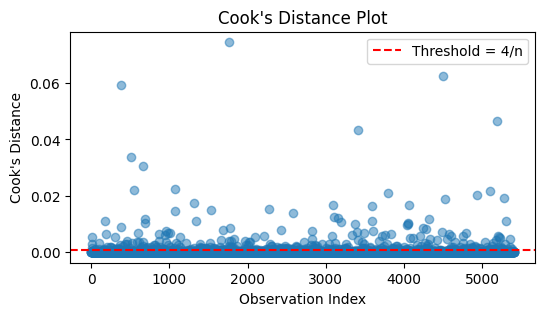

In [42]:
influence = OLSInfluence(robust_model)
cooks_distance = influence.cooks_distance
cooks_distance_df = pd.DataFrame({'Cook\'s Distance': cooks_distance[0]})

# Scatter plot of Cook's distance
plt.figure(figsize=(6, 3))
plt.scatter(range(len(cooks_distance_df)), cooks_distance_df['Cook\'s Distance'], alpha=0.5)
plt.axhline(y=4 / len(X_train), color='r', linestyle='--', label='Threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.legend()
plt.show()

In the final model, all properties exhibit Cook's Distance values below 0.07, indicating a low influence of any single property on the model. This is good for the model's stability and robustness.







<font size="5"> MSE of the model:

In [43]:
residuals = robust_model.resid
mse0 = np.mean(residuals**2)
print(f'Mean Squared Error: {mse0}')

Mean Squared Error: 261756.36149823663


The MSE provides an evaluation metric of the model that will eventually allow for comparison with different approaches.

<font size="6.5"> Prices for houses, cottages, villas, semis, and terraces:

<font size="5"> First model:

In [44]:
# training and test data generation
target_variable = 'Price_(k)'
df11 = dft1.copy()
variables_to_drop = df11.select_dtypes(exclude=['number'])
X = df11.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
y = df11[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit()

# Exclude the first column (constant term)
X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(model.summary())

  Variable   VIF
0       x1 1.869
1       x2 1.194
2       x3 1.772
3       x4 1.273
4       x5 1.504
5       x6 1.634
6       x7 1.004
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     504.4
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:30:40   Log-Likelihood:                -32783.
No. Observations:                4259   AIC:                         6.558e+04
Df Residuals:                    4251   BIC:                         6.563e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

<font size="5">Checking homoscedasticity:

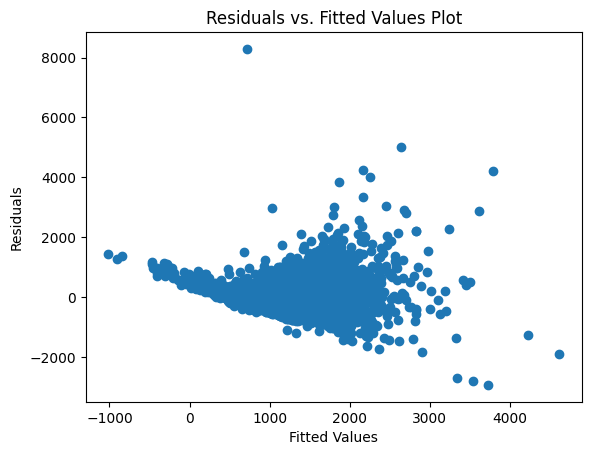

In [45]:
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.show()

The residuals' distribution doesn't conform well to the homoscedasticity assumption. Hence, opting for a robust model could be a good idea.

<font size="5"> Second model (robust):

In [46]:
robust_model = sm.OLS(y_train, X_train_scaled_with_constant).fit(cov_type='HC3')

# Print the summary of the model with robust standard errors and vif values
print(vif_data)
print(robust_model.summary())

  Variable   VIF
0       x1 1.869
1       x2 1.194
2       x3 1.772
3       x4 1.273
4       x5 1.504
5       x6 1.634
6       x7 1.004
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     195.2
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          9.82e-252
Time:                        12:30:44   Log-Likelihood:                -32783.
No. Observations:                4259   AIC:                         6.558e+04
Df Residuals:                    4251   BIC:                         6.563e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.

Multicollinearity is not an issue, indicating no redundancy of information among features. However, certain features appear to be irrelevant to the model and should be removed.

<font size="5"> Third model (removed low impact features):


In [47]:
# training and test data generation
target_variable = 'Price_(k)'
failed_ttest = 'Propertycount'
df11 = dft1.copy()
variables_to_drop = df11.select_dtypes(exclude=['number'])
X = df11.drop(variables_to_drop, axis=1)
X = X.drop(failed_ttest, axis=1)
X = X.drop(target_variable, axis=1)
y = df11[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
robust_model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit(cov_type='HC3')

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(robust_model.summary())

  Variable   VIF
0       x1 1.869
1       x2 1.194
2       x3 1.771
3       x4 1.271
4       x5 1.501
5       x6 1.634
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     227.1
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          2.66e-252
Time:                        12:30:46   Log-Likelihood:                -32783.
No. Observations:                4259   AIC:                         6.558e+04
Df Residuals:                    4252   BIC:                         6.562e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------

In this model, the least impactful feature, the number of properties in the suburb, has been eliminated. However, the model still includes a feature that is considered irrelevant based on the performed z-test and will therefore be removed.

<font size="5"> Fourth model (removed low impact features):


In [48]:
# training and test data generation
target_variable = 'Price_(k)'
failed_ttest = ['Propertycount', 'ParkingSpot']
df11 = dft1.copy()
variables_to_drop = df11.select_dtypes(exclude=['number'])
X = df11.drop(variables_to_drop, axis=1)
X = X.drop(failed_ttest, axis=1)
X = X.drop(target_variable, axis=1)
y = df11[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
robust_model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit(cov_type='HC3')

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x5', 'x6']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(robust_model.summary())
std_dev_variables = X_train[X_train.columns[robust_model.pvalues[1:] < 0.05]].std()
print("Significative features std dev:")
print(std_dev_variables)
std_dev_y = y_train.std()
print("Price std dev:", std_dev_y)

  Variable   VIF
0       x1 1.856
1       x2 1.186
2       x3 1.752
3       x5 1.395
4       x6 1.631
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     269.4
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          6.82e-251
Time:                        12:30:49   Log-Likelihood:                -32783.
No. Observations:                4259   AIC:                         6.558e+04
Df Residuals:                    4253   BIC:                         6.562e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

The second and last uninformative feature, the number of parking spots, has been excluded. Before assessing the results, it's prudent to examine potentially influential houses that might exert excessive impact on the model parameters. This means checking the D-cook values for the houses.







<font size="5"> Checking for excessively impactful properties:

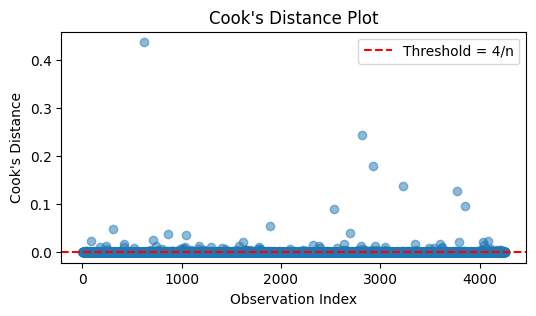

In [49]:
influence = OLSInfluence(robust_model)
cooks_distance = influence.cooks_distance
cooks_distance_df = pd.DataFrame({'Cook\'s Distance': cooks_distance[0]})

# Scatter plot of Cook's distance
plt.figure(figsize=(6, 3))
plt.scatter(range(len(cooks_distance_df)), cooks_distance_df['Cook\'s Distance'], alpha=0.5)
plt.axhline(y=4 / len(X_train), color='r', linestyle='--', label='Threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.legend()
plt.show()

The Cooks's distance plot shows that all values assigned to points are below 0.5. This is not an excessively high roof value, but given the fairly large amount of houses the model is working with, it could be given a try to remove some of the most influential houses to push the roof value further down.

<font size="5"> MSE of the model:

In [50]:
residuals = robust_model.resid
mse1 = np.mean(residuals**2)
print(f'Mean Squared Error: {mse1}')

Mean Squared Error: 284073.2292745499


<font size="5"> Fifth model (removed the most influencial houses):




In [51]:
# training and test data generation
df110 = df11.copy()
df110['Cook\'s Distance'] = cooks_distance_df['Cook\'s Distance']
top_Dcooks_indices = df110['Cook\'s Distance'].nlargest(22).index
df110 = df110.drop(top_Dcooks_indices)
dcook_drop = 'Cook\'s Distance'
df110 = df110.drop(dcook_drop, axis=1)

target_variable = 'Price_(k)'
variables_to_drop = df110.select_dtypes(exclude=['number'])
failed_ttest = ['Propertycount', 'ParkingSpot']
X = df110.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
X = X.drop(failed_ttest, axis=1)
y = df110[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
robust_model = sm.OLS(y_train, X_train_scaled_with_constant).fit(cov_type='HC3')

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x5', 'x6']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(robust_model.summary())

  Variable   VIF
0       x1 1.829
1       x2 1.159
2       x3 1.789
3       x5 1.297
4       x6 1.687
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     350.4
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          4.82e-315
Time:                        12:30:56   Log-Likelihood:                -32324.
No. Observations:                4239   AIC:                         6.466e+04
Df Residuals:                    4233   BIC:                         6.470e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

As demonstrated by the graph below, even after removing multiple properties, the set of Cook's Distance values consistently showed houses with influence levels noticeably higher or in the vicinity of those presented by the model that considered all residences. The chosen approach is to regard the fourth model as the final one, and the one that will now be discussed.

This model explains approximately 45.4% of the variance in the prices of Melbourne houses, cottages, villas, semis, and terraces, a similar proportion compared to the general model, again not superb. According to this model, house prices are estimated based on six values: five house features and a constant. The constant (1269 in this case) can be interpreted as the theoretical price (in thousands of dollars) for a house where all other considered features have an average value.

The price is directly correlated with the number of bedrooms, number of bathrooms, land size, and building area. This implies that an increase in any of these features is associated with a rise in the price. Similar to the overall model, the distance from the CBD is the only feature negatively correlated with the price, indicating that the further away a house is from the CBD, the lower the price tends to be.

Since the data has been standardized, the coefficients for significant features can be interpreted as the variation a one-standard-deviation variation in the considered feature would theoretically be matched with in the price of a property. No causality is implied.
The feature with the most significant impact on price estimation for a house, in terms of one standard deviation variation, is again the only negatively correlated one. This suggests that, holding all other features constant, a property 'a' which is 6.3 km further away from the CBD compared to property 'b' will be approximately 349k dollars cheaper.
The most positively impactful feature (in terms of standard deviation) is the number of bathrooms. Given that all other features are equal, a property 'a' that has 0.76 more bathrooms compared to a property 'b' will be about 178k dollars more expensive.

<font size="5"> Checking for excessively impactful properties:

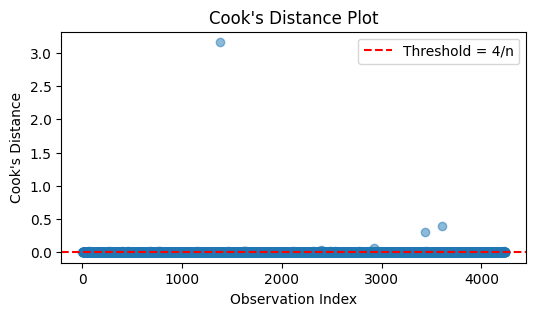

In [52]:
influence = OLSInfluence(robust_model)
cooks_distance = influence.cooks_distance

# Display Cook's distance
cooks_distance_df = pd.DataFrame({'Cook\'s Distance': cooks_distance[0]})

# Scatter plot of Cook's distance
plt.figure(figsize=(6, 3))  # Adjust figure size as needed
plt.scatter(range(len(cooks_distance_df)), cooks_distance_df['Cook\'s Distance'], alpha=0.5)
plt.axhline(y=4 / len(X_train), color='r', linestyle='--', label='Threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.legend()
plt.show()

As this plot shows, sometimes removing elements from the model might result in some other elements having much more dominance over the model than the ones that were initially removed.

<font size="6.5"> Prices for units and duplexes:

<font size="5"> First model:

In [53]:
# training and test data generation
target_variable = 'Price_(k)'
df12 = dft2.copy()
variables_to_drop = df12.select_dtypes(exclude=['number'])
X = df12.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
y = df12[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit()

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(model.summary())

  Variable   VIF
0       x1 1.677
1       x2 1.317
2       x3 1.405
3       x4 1.241
4       x5 1.221
5       x6 1.504
6       x7 1.020
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     53.56
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.79e-59
Time:                        12:34:19   Log-Likelihood:                -4082.8
No. Observations:                 615   AIC:                             8182.
Df Residuals:                     607   BIC:                             8217.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

<font size="5">Checking homoscedasticity:

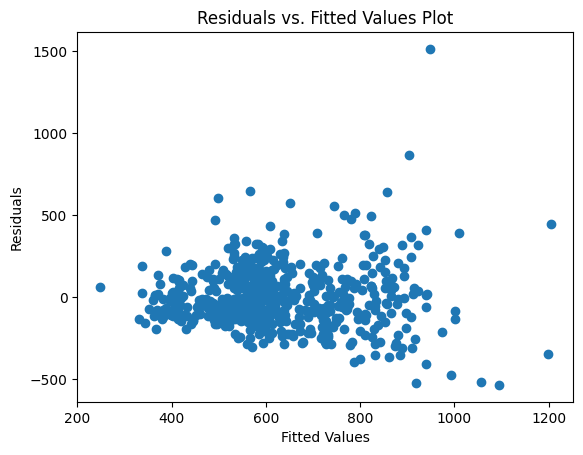

In [54]:
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.show()

The homoscedasticity assumption appears to be satisfied, eliminating the need for a robust model. The first model can then be considered; there are no issues related to multicollinearity. Consequently, we can proceed with the removal of unnecessary features.

<font size="5"> Second model (removed low impact features):


In [55]:
# training and test data generation
target_variable = 'Price_(k)'
failed_ttest = 'Landsize'
df12 = dft2.copy()
variables_to_drop = df12.select_dtypes(exclude=['number'])
X = df12.drop(variables_to_drop, axis=1)
X = X.drop(failed_ttest, axis=1)
X = X.drop(target_variable, axis=1)
y = df12[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit()

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x4', 'x6', 'x7']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(model.summary())

  Variable   VIF
0       x1 1.635
1       x2 1.183
2       x3 1.362
3       x4 1.239
4       x6 1.501
5       x7 1.020
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     62.57
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           2.24e-60
Time:                        12:34:23   Log-Likelihood:                -4082.8
No. Observations:                 615   AIC:                             8180.
Df Residuals:                     608   BIC:                             8211.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

The least important feature, land size, has been removed, revealing that it was not the only feature that warranted elimination in the new model.

<font size="5"> Third model (removed low impact features):


In [56]:
# training and test data generation
target_variable = 'Price_(k)'
failed_ttest = ['Landsize', 'Propertycount']
df12 = dft2.copy()
variables_to_drop = df12.select_dtypes(exclude=['number'])
X = df12.drop(variables_to_drop, axis=1)
X = X.drop(failed_ttest, axis=1)
X = X.drop(target_variable, axis=1)
y = df12[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit()

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x4', 'x6']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(model.summary())

  Variable   VIF
0       x1 1.635
1       x2 1.175
2       x3 1.357
3       x4 1.238
4       x6 1.501
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     74.46
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           7.77e-61
Time:                        12:34:26   Log-Likelihood:                -4084.0
No. Observations:                 615   AIC:                             8180.
Df Residuals:                     609   BIC:                             8207.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

The second and final uninformative feature, the number of properties in the suburb, has been removed. Before evaluating the results, it is prudent to check for any particularly influential house that might exert too much impact on the model parameters. This involves checking the Cook's Distance values for the houses.

<font size="5"> Checking for excessively impactful units or duplexes:

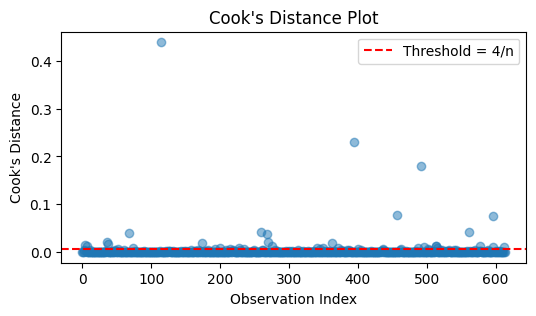

In [57]:
influence = OLSInfluence(model)
cooks_distance = influence.cooks_distance
cooks_distance_df = pd.DataFrame({'Cook\'s Distance': cooks_distance[0]})

# Scatter plot of Cook's distance
plt.figure(figsize=(6, 3))
plt.scatter(range(len(cooks_distance_df)), cooks_distance_df['Cook\'s Distance'], alpha=0.5)
plt.axhline(y=4 / len(X_train), color='r', linestyle='--', label='Threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.legend()
plt.show()

The Cook's Distance plot indicates that all values assigned to points are below 0.5. While this is not an excessively high threshold, considering the fairly large number of houses in the model, it might be worth attempting to remove some of the most influential houses to further decrease the threshold value.

<font size="5"> Fourth model (removed the most influencial units and duplexes):


In [58]:
# training and test data generation
df120 = df12.copy()
df120['Cook\'s Distance'] = cooks_distance_df['Cook\'s Distance']
top_Dcooks_indices = df120['Cook\'s Distance'].nlargest(3).index
df120 = df120.drop(top_Dcooks_indices)
dcook_drop = 'Cook\'s Distance'
df120 = df120.drop(dcook_drop, axis=1)

target_variable = 'Price_(k)'
variables_to_drop = df120.select_dtypes(exclude=['number'])
failed_ttest = ['Landsize', 'Propertycount']
X = df120.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
X = X.drop(failed_ttest, axis=1)
y = df120[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
model = sm.OLS(y_train, X_train_scaled_with_constant).fit()

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x4', 'x6']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values
print(vif_data)
print(model.summary())
std_dev_variables = X_train[X_train.columns[robust_model.pvalues[1:] < 0.05]].std()
print("Significative features std dev:")
print(std_dev_variables)
std_dev_y = y_train.std()
print("Price std dev:", std_dev_y)

  Variable   VIF
0       x1 1.733
1       x2 1.186
2       x3 1.336
3       x4 1.237
4       x6 1.593
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     85.89
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           3.45e-68
Time:                        12:34:31   Log-Likelihood:                -4017.7
No. Observations:                 612   AIC:                             8047.
Df Residuals:                     606   BIC:                             8074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

This model explains approximately 41.5% of the variance in the prices of Melbourne units and duplexes, slightly less than the general model and the one for houses.

According to this model, the price can be estimated using six values: five house features and a constant. The price is directly correlated with the number of bedrooms, number of bathrooms, number of parking spots, and building area, indicating that an increase in any of these features is associated with a rise in price. Once again, the distance from the CBD is the only feature negatively correlated with the price, meaning that the further away a unit is from the CBD, the lower the price tends to be.

Due to data standardization, we can interpret the coefficients for significant features as the amount of swing that a one-standard-deviation variation in the considered feature would theoretically be matched with by the price of a property. It's crucial to note that no causality is implied. The feature with the most significant impact, in terms of one standard deviation variation, is the number of bedrooms. Given that all other features are kept the same, a property "a" with 0.6 more bedrooms compared to property "b" will be about 75k dollars more expensive. The least impactful feature, in terms of standard deviation, is the number of parking spots. Holding all other features constant, a property "a" with 0.47 more parking spots compared to a property "b" will be about 25k dollars more expensive.

<font size="5"> Checking for excessively impactful units or duplexes:

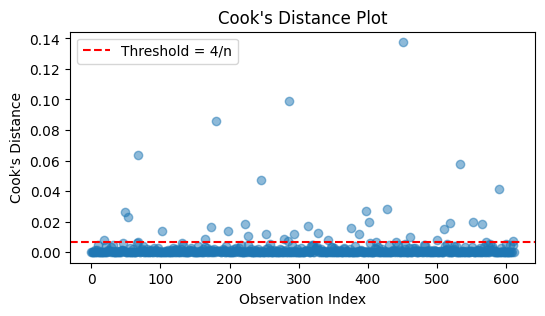

In [59]:
influence = OLSInfluence(model)
cooks_distance = influence.cooks_distance
cooks_distance_df = pd.DataFrame({'Cook\'s Distance': cooks_distance[0]})

# Scatter plot of Cook's distance
plt.figure(figsize=(6, 3))
plt.scatter(range(len(cooks_distance_df)), cooks_distance_df['Cook\'s Distance'], alpha=0.5)
plt.axhline(y=4 / len(X_train), color='r', linestyle='--', label='Threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.legend()
plt.show()

Removing the most influential units gave the desired effect, helping the model be more stable and even slightly increasing the goodness of the model.

<font size="5"> MSE of the model:

In [60]:
residuals = model.resid
mse2 = np.mean(residuals**2)
print(f'Mean Squared Error: {mse2}')

Mean Squared Error: 29490.25228354796


<font size="6.5"> Prices for townhouses; development sites and other residentials:

<font size="5"> First model:

In [61]:
# training and test data generation
target_variable = 'Price_(k)'
df13 = dft3.copy()
variables_to_drop = df13.select_dtypes(exclude=['number'])
X = df13.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
y = df13[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit()

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(model.summary())

  Variable   VIF
0       x1 1.891
1       x2 1.046
2       x3 1.616
3       x4 1.209
4       x5 1.017
5       x6 1.525
6       x7 1.029
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     55.41
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           3.96e-59
Time:                        12:35:48   Log-Likelihood:                -3758.3
No. Observations:                 531   AIC:                             7533.
Df Residuals:                     523   BIC:                             7567.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

<font size="5">Checking homoscedasticity:

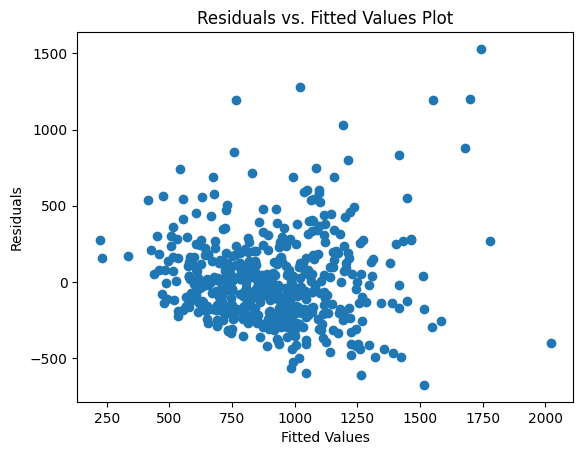

In [62]:
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.show()

The residual distribution does not properly satisfy the homoscedasticity assumption. A robust model is required.

<font size="5"> Second model (robust):

In [63]:
robust_model = sm.OLS(y_train, X_train_scaled_with_constant).fit(cov_type='HC3')

# Print the summary of the model with robust standard errors
print(vif_data)
print(robust_model.summary())

  Variable   VIF
0       x1 1.891
1       x2 1.046
2       x3 1.616
3       x4 1.209
4       x5 1.017
5       x6 1.525
6       x7 1.029
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     30.82
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           9.52e-36
Time:                        12:35:52   Log-Likelihood:                -3758.3
No. Observations:                 531   AIC:                             7533.
Df Residuals:                     523   BIC:                             7567.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.

Multicollinearity is not present, so there is no need to remove any feature due to information redundancy. However, certain features appear to be irrelevant to the model and should be removed.

<font size="5"> Third model (removed low impact features):


In [64]:
# training and test data generation
target_variable = 'Price_(k)'
failed_ttest = 'Landsize'
df13 = dft3.copy()
variables_to_drop = df13.select_dtypes(exclude=['number'])
X = df13.drop(variables_to_drop, axis=1)
X = X.drop(failed_ttest, axis=1)
X = X.drop(target_variable, axis=1)
y = df13[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
robust_model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit(cov_type='HC3')

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x1', 'x2', 'x3', 'x4', 'x6', 'x7']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and info
print(vif_data)
print(robust_model.summary())

  Variable   VIF
0       x1 1.890
1       x2 1.038
2       x3 1.615
3       x4 1.205
4       x6 1.521
5       x7 1.028
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     36.05
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.44e-36
Time:                        12:35:54   Log-Likelihood:                -3759.3
No. Observations:                 531   AIC:                             7533.
Df Residuals:                     524   BIC:                             7562.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------

The non-significant feature, land size, has been removed from the model.

<font size="5"> Fourth model (removed low impact features):


In [65]:
# training and test data generation
target_variable = 'Price_(k)'
failed_ttest = ['Landsize', 'Bedrooms']
df13 = dft3.copy()
variables_to_drop = df13.select_dtypes(exclude=['number'])
X = df13.drop(variables_to_drop, axis=1)
X = X.drop(failed_ttest, axis=1)
X = X.drop(target_variable, axis=1)
y = df13[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
robust_model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit(cov_type='HC3')

X_for_vif = X_train_scaled_with_constant[:, 1:]

column_names = ['x2', 'x3', 'x4', 'x6', 'x7']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(robust_model.summary())

  Variable   VIF
0       x2 1.030
1       x3 1.330
2       x4 1.136
3       x6 1.367
4       x7 1.026
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     39.17
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           3.34e-34
Time:                        12:35:57   Log-Likelihood:                -3760.7
No. Observations:                 531   AIC:                             7533.
Df Residuals:                     525   BIC:                             7559.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

The second and final uninformative feature, the number of bedrooms, has been removed. While an argument could be made for removing the number of properties in the suburb from the model, considering the already mediocre goodness of the model and the manageable number of features, it has been chosen to retain it. Anyway, before evaluating the results, it is prudent to check for any particularly influential property that might have too much impact on the model parameters. To do so, the D-cook values for the houses need to be checked.

<font size="5"> Checking for excessively impactful townhouses:

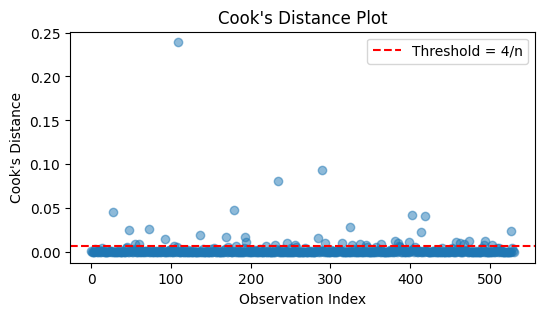

In [66]:
influence = OLSInfluence(robust_model)
cooks_distance = influence.cooks_distance
cooks_distance_df = pd.DataFrame({'Cook\'s Distance': cooks_distance[0]})

# Scatter plot of Cook's distance
plt.figure(figsize=(6, 3))  # Adjust figure size as needed
plt.scatter(range(len(cooks_distance_df)), cooks_distance_df['Cook\'s Distance'], alpha=0.5)
plt.axhline(y=4 / len(X_train), color='r', linestyle='--', label='Threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.legend()
plt.show()

The Cook's Distance plot reveals that all values assigned to points are below 0.25. While this is not an excessively high threshold, considering the decent number of houses the model is working with, it might be worthwhile to attempt removing some of the most influential houses to further reduce the threshold value.

<font size="5"> Fourth model (removed the most influencial properties):


In [67]:
df130 = df13.copy()
df130['Cook\'s Distance'] = cooks_distance_df['Cook\'s Distance']
top_Dcooks_indices = df130['Cook\'s Distance'].nlargest(6).index
df130 = df130.drop(top_Dcooks_indices)
dcook_drop = 'Cook\'s Distance'
df130 = df130.drop(dcook_drop, axis=1)

target_variable = 'Price_(k)'
variables_to_drop = df130.select_dtypes(exclude=['number'])
failed_ttest = ['Bedrooms', 'Landsize']
X = df130.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
X = X.drop(failed_ttest, axis=1)
y = df130[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
robust_model = sm.OLS(y_train, X_train_scaled_with_constant).fit(cov_type='HC3')

X_for_vif = X_train_scaled_with_constant[:, 1:]  # Exclude the first column (constant term)

# Assuming you have column names stored in a separate variable
column_names = ['x2', 'x3', 'x4', 'x6', 'x7']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values
print(vif_data)
print(robust_model.summary())
std_dev_variables = X_train[X_train.columns[robust_model.pvalues[1:] < 0.5]].std()
print("Significative features std dev:")
print(std_dev_variables)
std_dev_y = y_train.std()
print("Price std dev:", std_dev_y)

  Variable   VIF
0       x2 1.054
1       x3 1.368
2       x4 1.149
3       x6 1.408
4       x7 1.029
                            OLS Regression Results                            
Dep. Variable:              Price_(k)   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     55.90
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.78e-46
Time:                        12:36:09   Log-Likelihood:                -3695.7
No. Observations:                 526   AIC:                             7403.
Df Residuals:                     520   BIC:                             7429.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

This model manages to explain about 40% of the variance of the price of Melbourne townhouses, which is a slightly smaller amount compared to the general model and the houses one, and in line with the units model.

 According to this model, the price can be esteemed through 6 values: 5 house features and a constant. The price is directly correlated with the number of bathrooms, number of parking spots, building area and number of properties in the suburb, which means that a variation of one of any of these features is associated with a same direction variation of the price. Again, the distance from the CBD is the only feature that is negatively correlated with the price; this means that the further away from the CBD a townhouse is, the lower the price tends to be. After the removal of some of the most influential townhouses, the number of property in the suburb does not manage to properly pass the significance test, anyway, because of the close result, the fact that the accuracy of this model is not extremely high and the fact that the model is not computationally very complex, it has been chosen to keep it in.

 Because of the fact that the data has been standardized, we can interpret the coefficients for the significative features of the model as the growth a 1 standard deviation increase of the considered feature would theoretically be matched with by the price of a property (note that no causality is implied). The feature whose 1 standard deviation variation would mean the biggest swing in the price esteem for a townhouse is again the building area: given that all other features are equal, a property "a" which is 54 squared meters larger compared to property "b" will be about 153k dollars more expensive. The least impactful (standard-deviation-wise) feature is the number of properties in the suburb. Given that all other features are equal, a property "a" which counts 4257 more properties in its suburb compared to a property "b", will be about 19k dollars more expensive, but with (low) possibility of negative correlation.

<font size="5"> Checking for excessively impactful townhouses:

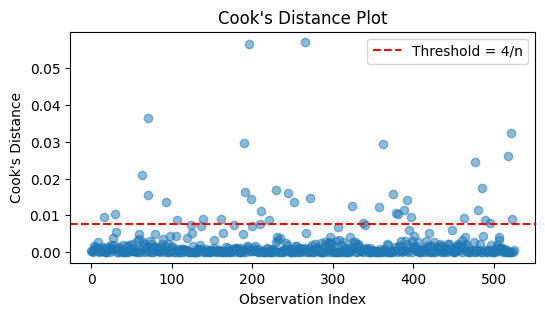

In [68]:
influence = OLSInfluence(robust_model)
cooks_distance = influence.cooks_distance

# Display Cook's distance
cooks_distance_df = pd.DataFrame({'Cook\'s Distance': cooks_distance[0]})

# Scatter plot of Cook's distance
plt.figure(figsize=(6, 3))  # Adjust figure size as needed
plt.scatter(range(len(cooks_distance_df)), cooks_distance_df['Cook\'s Distance'], alpha=0.5)
plt.axhline(y=4 / len(X_train), color='r', linestyle='--', label='Threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.legend()
plt.show()

In the model where the six most influential properties have been removed, no house exceeds the 0.06 value. This indicates that the resulting model is highly stable.

<font size="5"> MSE of the model:

In [69]:
residuals = robust_model.resid
mse3 = np.mean(residuals**2)
print(f'Mean Squared Error: {mse3}')

Mean Squared Error: 74167.37431303499


<font size="10">Linear Regression for price per squared meter prediction:

</font>

In [70]:
# training and test data generation
target_variable = 'Price_m2'
variables_to_drop = df2.select_dtypes(exclude=['number'])

X = df2.drop(variables_to_drop, axis=1)
X = X.drop(target_variable, axis=1)
y = df2[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the standardized training data (for the intercept of the model)
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)

# Fit the OLS model using the standardized training data
model = sm.OLS(y_train, X_train_scaled_with_constant.astype(float)).fit()


# computing the VIF values for the features (Variance Inflation Factor)
X_for_vif = X_train_scaled_with_constant[:, 1:]
column_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
vif_data = pd.DataFrame()
vif_data["Variable"] = column_names
vif_data["VIF"] = [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]

# Display VIF values and model info
print(vif_data)
print(model.summary())

  Variable   VIF
0       x1 1.719
1       x2 1.080
2       x3 1.591
3       x4 1.232
4       x5 1.020
5       x6 1.004
                            OLS Regression Results                            
Dep. Variable:               Price_m2   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     105.6
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          3.76e-126
Time:                        12:39:30   Log-Likelihood:                -16000.
No. Observations:                5364   AIC:                         3.201e+04
Df Residuals:                    5357   BIC:                         3.206e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

Without performing additional fine tuning for the model, it is already obvious how liner regression is not able to capture nearly enough information about the squared meter price for Melbourne properties using the available information. It would make little sense to push this linear regression analysis forward.

In [71]:
residuals = model.resid
mse4 = np.mean(residuals**2)
print(f'Mean Squared Error: {mse4}')

Mean Squared Error: 22.824357472034947


<font size="10">Neural Network for price prediction:

</font>

<font size="6.5"> Overall price prediction:

<font size="5"> Data preparation:

In [72]:
target_variable = 'Price_(k)'
df100 = df1.copy()

df100['Bedrooms'] = df100['Bedrooms'].astype('float64')
df100['Bathroom'] = df100['Bathroom'].astype('float64')
df100['ParkingSpot'] = df100['ParkingSpot'].astype('float64')
df100['Landsize'] = df100['Landsize'].astype('float64')
df100['Propertycount'] = df100['Propertycount'].astype('float64')

# Select numeric columns
numeric_df = df100.select_dtypes(include=['float64'])

# Separate features and target variable
X = numeric_df.drop(target_variable, axis=1)
y = numeric_df[target_variable]

# Convert to tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<font size="5"> Model architecture:

In [73]:
class PricePredictionNN(nn.Module):
    def __init__(self, input_size):
        super(PricePredictionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc4 = nn.Linear(512, 1024)
        self.bn4 = nn.BatchNorm1d(1024)
        self.fc5 = nn.Linear(1024, 512)
        self.bn5 = nn.BatchNorm1d(512)
        self.fc6 = nn.Linear(512, 512)
        self.bn6 = nn.BatchNorm1d(512)
        self.fc7 = nn.Linear(512, 256)
        self.bn7 = nn.BatchNorm1d(256)
        self.fc8 = nn.Linear(256, 64)
        self.bn8 = nn.BatchNorm1d(64)
        self.fc9 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.2)
        self.dropout3 = nn.Dropout(0.15)


    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc5(x)
        x = self.bn5(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc6(x)
        x = self.bn6(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc7(x)
        x = self.bn7(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc8(x)
        x = self.bn8(x)
        x = self.relu(x)
        x = self.fc9(x)

        return x

input_size = X_train.shape[1]
model = PricePredictionNN(input_size)

<font size="5"> Fine tuning:

In [74]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)
num_epochs = 200

# Define a polynomial learning rate scheduler
lambda_lr = lambda epoch: (1 - epoch / num_epochs)**0.9
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_lr)

# Convert data to DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

best_val_loss = float('inf')

<font size="5"> Model training:

In [75]:
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Learning rate scheduler step
    scheduler.step()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, targets in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)

    if epoch <=4 or epoch >= 194:
      print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss}')

Epoch 1/200, Training Loss: 1835425.75, Validation Loss: 2013578.5
Epoch 2/200, Training Loss: 1961066.0, Validation Loss: 1991900.425
Epoch 3/200, Training Loss: 1711083.75, Validation Loss: 1992922.4
Epoch 4/200, Training Loss: 1698360.125, Validation Loss: 1970266.4
Epoch 5/200, Training Loss: 2077756.75, Validation Loss: 1924138.8
Epoch 195/200, Training Loss: 332588.15625, Validation Loss: 228226.0421875
Epoch 196/200, Training Loss: 162076.296875, Validation Loss: 227829.5140625
Epoch 197/200, Training Loss: 182011.734375, Validation Loss: 228241.26875
Epoch 198/200, Training Loss: 214446.34375, Validation Loss: 227235.421875
Epoch 199/200, Training Loss: 184983.984375, Validation Loss: 225010.496875
Epoch 200/200, Training Loss: 124101.78125, Validation Loss: 226534.71875


<font size="5"> Model testing:

In [76]:
# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    predictions0 = model(X_test)
    test_loss = criterion(predictions0, y_test)
    mse00 = test_loss.item()
    print(f'Test Loss: {mse00}')

Test Loss: 169282.390625


<font size="6.5"> Houses, cottages, villas, semis, and terraces price prediction:

<font size="5"> Data preparation:

In [77]:
target_variable = 'Price_(k)'
df101 = dft1.copy()

df101['Bedrooms'] = df101['Bedrooms'].astype('float64')
df101['Bathroom'] = df101['Bathroom'].astype('float64')
df101['ParkingSpot'] = df101['ParkingSpot'].astype('float64')
df101['Landsize'] = df101['Landsize'].astype('float64')
df101['Propertycount'] = df101['Propertycount'].astype('float64')

# Select numeric columns
numeric_df = df101.select_dtypes(include=['float64'])

# Separate features and target variable
X = numeric_df.drop(target_variable, axis=1)
y = numeric_df[target_variable]

# Convert to tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<font size="5"> Model architecture:

In [78]:
class HPricePredictionNN(nn.Module):
    def __init__(self, input_size):
        super(HPricePredictionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc4 = nn.Linear(512, 512)
        self.bn4 = nn.BatchNorm1d(512)
        self.fc5 = nn.Linear(512, 256)
        self.bn5 = nn.BatchNorm1d(256)
        self.fc6 = nn.Linear(256, 256)
        self.bn6 = nn.BatchNorm1d(256)
        self.fc7 = nn.Linear(256, 64)
        self.bn7 = nn.BatchNorm1d(64)
        self.fc8 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)


    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc5(x)
        x = self.bn5(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc6(x)
        x = self.bn6(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc7(x)
        x = self.bn7(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc8(x)
        return x

input_size = X_train.shape[1]
model1 = HPricePredictionNN(input_size)

<font size="5"> Fine tuning:

In [79]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.005)

num_epochs = 150

# Define a polynomial learning rate scheduler
lambda_lr = lambda epoch: (1 - epoch / num_epochs)**0.9
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_lr)

# Convert data to DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

best_val_loss = float('inf')

<font size="5"> Model training:

In [80]:
for epoch in range(num_epochs):
    model1.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Learning rate scheduler step
    scheduler.step()

    # Evaluate the model on the validation set
    model1.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, targets in val_loader:
            outputs = model1(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)

    if epoch <=4 or epoch >= 144:
          print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss}')

Epoch 1/150, Training Loss: 1896893.875, Validation Loss: 1889355.09375
Epoch 2/150, Training Loss: 2169886.0, Validation Loss: 1829116.78125
Epoch 3/150, Training Loss: 1397660.375, Validation Loss: 1800402.125
Epoch 4/150, Training Loss: 1891153.125, Validation Loss: 1789415.65625
Epoch 5/150, Training Loss: 1528011.75, Validation Loss: 1600286.21875
Epoch 145/150, Training Loss: 160529.71875, Validation Loss: 220953.6015625
Epoch 146/150, Training Loss: 176166.0, Validation Loss: 207130.1171875
Epoch 147/150, Training Loss: 147118.234375, Validation Loss: 207933.15234375
Epoch 148/150, Training Loss: 260438.03125, Validation Loss: 213664.48828125
Epoch 149/150, Training Loss: 241973.546875, Validation Loss: 206281.17578125
Epoch 150/150, Training Loss: 1071066.625, Validation Loss: 209233.74609375


<font size="5"> Model testing:

In [81]:
# Evaluate the model on the test set
with torch.no_grad():
    model1.eval()
    predictions1 = model1(X_test)
    test_loss = criterion(predictions1, y_test)
    mse10 = test_loss.item()
    print(f'Test Loss: {mse10}')

Test Loss: 192889.140625


<font size="6.5"> <font size="6.5"> Units and duplexes price prediction:

<font size="5"> Data preparation:

In [82]:
target_variable = 'Price_(k)'
df102 = dft2.copy()

df102['Bedrooms'] = df102['Bedrooms'].astype('float64')
df102['Bathroom'] = df102['Bathroom'].astype('float64')
df102['ParkingSpot'] = df102['ParkingSpot'].astype('float64')
df102['Landsize'] = df102['Landsize'].astype('float64')
df102['Propertycount'] = df102['Propertycount'].astype('float64')

top_prices_indices = df102['Price_(k)'].nlargest(4).index
df102 = df102.drop(top_prices_indices)

# Select numeric columns
numeric_df = df102.select_dtypes(include=['float64'])

# Separate features and target variable
X = numeric_df.drop(target_variable, axis=1)
y = numeric_df[target_variable]

# Convert to tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<font size="5"> Model architecture:

In [83]:
class UPricePredictionNN(nn.Module):
    def __init__(self, input_size):
        super(UPricePredictionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc4 = nn.Linear(512, 256)
        self.bn4 = nn.BatchNorm1d(256)
        self.fc5 = nn.Linear(256, 256)
        self.bn5 = nn.BatchNorm1d(256)
        self.fc6 = nn.Linear(256, 64)
        self.bn6 = nn.BatchNorm1d(64)
        self.fc7 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.15)


    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc5(x)
        x = self.bn5(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc6(x)
        x = self.bn6(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc7(x)
        return x

input_size = X_train.shape[1]
model2 = UPricePredictionNN(input_size)

<font size="5"> Fine tuning:

In [84]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.005)

num_epochs = 300

# Define a polynomial learning rate scheduler
lambda_lr = lambda epoch: (1 - epoch / num_epochs)**0.9
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_lr)

# Convert data to DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

best_val_loss = float('inf')

<font size="5"> Model training:

In [85]:
for epoch in range(num_epochs):
    model2.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Learning rate scheduler step
    scheduler.step()

    # Evaluate the model on the validation set
    model2.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, targets in val_loader:
            outputs = model2(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)

    if epoch <=4 or epoch >= 294:
          print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss}')

Epoch 1/300, Training Loss: 413657.4375, Validation Loss: 537193.875
Epoch 2/300, Training Loss: 324753.90625, Validation Loss: 535096.90625
Epoch 3/300, Training Loss: 394165.03125, Validation Loss: 530163.671875
Epoch 4/300, Training Loss: 358040.28125, Validation Loss: 527887.3125
Epoch 5/300, Training Loss: 429585.375, Validation Loss: 527590.546875
Epoch 295/300, Training Loss: 21482.494140625, Validation Loss: 31424.2138671875
Epoch 296/300, Training Loss: 18415.755859375, Validation Loss: 31682.62890625
Epoch 297/300, Training Loss: 43534.375, Validation Loss: 32156.244140625
Epoch 298/300, Training Loss: 28284.2421875, Validation Loss: 33309.0556640625
Epoch 299/300, Training Loss: 15616.958984375, Validation Loss: 34439.6923828125
Epoch 300/300, Training Loss: 23965.9765625, Validation Loss: 35018.31640625


<font size="5"> Model testing:

In [86]:
# Evaluate the model on the test set
with torch.no_grad():
    model2.eval()
    predictions2 = model2(X_test)
    test_loss = criterion(predictions2, y_test)
    mse20 = test_loss.item()
    print(f'Test Loss: {mse20}')

Test Loss: 13895.0146484375


<font size="6.5"> <font size="6.5"> Townhouses; development sites and other residentials price prediction:

<font size="5"> Data preparation:

In [87]:
target_variable = 'Price_(k)'
df103 = dft3.copy()

df103['Bedrooms'] = df103['Bedrooms'].astype('float64')
df103['Bathroom'] = df103['Bathroom'].astype('float64')
df103['ParkingSpot'] = df103['ParkingSpot'].astype('float64')
df103['Landsize'] = df103['Landsize'].astype('float64')
df103['Propertycount'] = df103['Propertycount'].astype('float64')

top_prices_indices = df103['Price_(k)'].nlargest(8).index
df103 = df103.drop(top_prices_indices)

# Select numeric columns
numeric_df = df103.select_dtypes(include=['float64'])

# Separate features and target variable
X = numeric_df.drop(target_variable, axis=1)
y = numeric_df[target_variable]

# Convert to tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<font size="5"> Model architecture:

In [88]:
class TPricePredictionNN(nn.Module):
    def __init__(self, input_size):
        super(TPricePredictionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc4 = nn.Linear(512, 512)
        self.bn4 = nn.BatchNorm1d(512)
        self.fc5 = nn.Linear(512, 1024)
        self.bn5 = nn.BatchNorm1d(1024)
        self.fc6 = nn.Linear(1024, 512)
        self.bn6 = nn.BatchNorm1d(512)
        self.fc7 = nn.Linear(512, 256)
        self.bn7 = nn.BatchNorm1d(256)
        self.fc8 = nn.Linear(256, 64)
        self.bn8 = nn.BatchNorm1d(64)
        self.fc9 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)


    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc5(x)
        x = self.bn5(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc6(x)
        x = self.bn6(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc7(x)
        x = self.bn7(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc8(x)
        x = self.bn8(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc9(x)
        return x

input_size = X_train.shape[1]
model3 = TPricePredictionNN(input_size)

<font size="5"> Fine tuning:

In [89]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model3.parameters(), lr=0.004)

num_epochs = 300

# Define a polynomial learning rate scheduler
lambda_lr = lambda epoch: (1 - epoch / num_epochs)**0.9
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_lr)

# Convert data to DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

best_val_loss = float('inf')

<font size="5"> Model training:

In [90]:
for epoch in range(num_epochs):
    model3.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Learning rate scheduler step
    scheduler.step()

    # Evaluate the model on the validation set
    model3.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, targets in val_loader:
            outputs = model3(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)

    if epoch <=4 or epoch >= 294:
      print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss}')

Epoch 1/300, Training Loss: 864429.5625, Validation Loss: 910716.75
Epoch 2/300, Training Loss: 805522.5, Validation Loss: 910086.8125
Epoch 3/300, Training Loss: 907128.0, Validation Loss: 906350.6875
Epoch 4/300, Training Loss: 982380.125, Validation Loss: 905218.0
Epoch 5/300, Training Loss: 870814.8125, Validation Loss: 902600.4375
Epoch 295/300, Training Loss: 92631.171875, Validation Loss: 117304.3984375
Epoch 296/300, Training Loss: 114799.0390625, Validation Loss: 119103.203125
Epoch 297/300, Training Loss: 96398.7421875, Validation Loss: 118794.6484375
Epoch 298/300, Training Loss: 124933.90625, Validation Loss: 121045.3828125
Epoch 299/300, Training Loss: 106274.2890625, Validation Loss: 120846.328125
Epoch 300/300, Training Loss: 98195.984375, Validation Loss: 122067.8984375


<font size="5"> Model testing:

In [91]:
# Evaluate the model on the test set
with torch.no_grad():
    model3.eval()
    predictions3 = model3(X_test)
    test_loss = criterion(predictions3, y_test)
    mse30 = test_loss.item()
    print(f'Test Loss: {mse30}')

Test Loss: 68480.390625


<font size="10">Neural Network for price per squared meter prediction:

</font>

<font size="6.5"> Overall squared meter price prediction:

<font size="5"> Data preparation:

In [92]:
target_variable = 'Price_m2'
df104 = df2.copy()

df104['Bedrooms'] = df104['Bedrooms'].astype('float64')
df104['Bathroom'] = df104['Bathroom'].astype('float64')
df104['ParkingSpot'] = df104['ParkingSpot'].astype('float64')
df104['Landsize'] = df104['Landsize'].astype('float64')
df104['Propertycount'] = df104['Propertycount'].astype('float64')

# Select numeric columns
numeric_df = df104.select_dtypes(include=['float64'])

# Separate features and target variable
X = numeric_df.drop(target_variable, axis=1)
y = numeric_df[target_variable]

# Convert to tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<font size="5"> Model architecture:

In [93]:
class M2PricePredictionNN(nn.Module):
    def __init__(self, input_size):
        super(M2PricePredictionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc4 = nn.Linear(512, 1024)
        self.bn4 = nn.BatchNorm1d(1024)
        self.fc5 = nn.Linear(1024, 2048)
        self.bn5 = nn.BatchNorm1d(2048)
        self.fc6 = nn.Linear(2048, 1024)
        self.bn6 = nn.BatchNorm1d(1024)
        self.fc8 = nn.Linear(1024, 512)
        self.bn8 = nn.BatchNorm1d(512)
        self.fc9 = nn.Linear(512, 512)
        self.bn9 = nn.BatchNorm1d(512)
        self.fc10 = nn.Linear(512, 256)
        self.bn10 = nn.BatchNorm1d(256)
        self.fc11 = nn.Linear(256, 64)
        self.bn11 = nn.BatchNorm1d(64)
        self.fc12 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.2)
        self.dropout3 = nn.Dropout(0.15)


    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc5(x)
        x = self.bn5(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc6(x)
        x = self.bn6(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc8(x)
        x = self.bn8(x)
        x = self.relu(x)
        x = self.fc9(x)
        x = self.bn9(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc10(x)
        x = self.bn10(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc11(x)
        x = self.bn11(x)
        x = self.relu(x)
        x = self.fc12(x)

        return x

input_size = X_train.shape[1]
model4 = M2PricePredictionNN(input_size)

<font size="5"> Fine tuning:

In [94]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model4.parameters(), lr=0.005)
num_epochs = 100

# Define a polynomial learning rate scheduler
lambda_lr = lambda epoch: (1 - epoch / num_epochs)**0.9
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_lr)

# Convert data to DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

best_val_loss = float('inf')

<font size="5"> Model training:

In [95]:
for epoch in range(num_epochs):
    model4.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model4(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Learning rate scheduler step
    scheduler.step()

    # Evaluate the model on the validation set
    model4.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, targets in val_loader:
            outputs = model4(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)

    if epoch <=4 or epoch >= 94:
      print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss}')

Epoch 1/100, Training Loss: 63.81349563598633, Validation Loss: 107.49706115722657
Epoch 2/100, Training Loss: 48.021949768066406, Validation Loss: 44.70087661743164
Epoch 3/100, Training Loss: 29.92070960998535, Validation Loss: 36.64864883422852
Epoch 4/100, Training Loss: 27.960556030273438, Validation Loss: 25.472646713256836
Epoch 5/100, Training Loss: 71.8282699584961, Validation Loss: 25.157788467407226
Epoch 95/100, Training Loss: 9.299726486206055, Validation Loss: 24.468885612487792
Epoch 96/100, Training Loss: 9.919672966003418, Validation Loss: 24.42409610748291
Epoch 97/100, Training Loss: 44.47698211669922, Validation Loss: 24.39886474609375
Epoch 98/100, Training Loss: 36.3899040222168, Validation Loss: 24.410082054138183
Epoch 99/100, Training Loss: 10.216766357421875, Validation Loss: 24.425102043151856
Epoch 100/100, Training Loss: 10.744498252868652, Validation Loss: 24.438938522338866


<font size="5"> Model testing:

In [96]:
# Evaluate the model on the test set
with torch.no_grad():
    model4.eval()
    predictions4 = model4(X_test)
    test_loss = criterion(predictions4, y_test)
    mse40 = test_loss.item()
    print(f'Test Loss: {mse40}')

Test Loss: 47.78080749511719


<font size="10"> Neural networks results discussion:

<font size="5"> Values:

In [100]:
print(f"Linear regression overall price:        MSE: {round(mse0, 3)};  RMSE: {round(np.sqrt(mse0), 3)};  REF: {round((np.sqrt(mse0)/(df1['Price_(k)'].mean())), 3)}")
print(f"Neural network overall price:           MSE: {round(mse00, 3)};  RMSE: {round(np.sqrt(mse00), 3)};  REF: {round((np.sqrt(mse00)/(df1['Price_(k)'].mean())), 3)} ")
print("")
print(f"Linear regression houses price:         MSE: {round(mse1, 3)};  RMSE: {round(np.sqrt(mse1), 3)};  REF: {round((np.sqrt(mse1)/(dft1['Price_(k)'].mean())),3)}")
print(f"Neural network houses price:            MSE: {round(mse10, 3)};  RMSE: {round(np.sqrt(mse10), 3)};  REF: {round((np.sqrt(mse10)/(dft1['Price_(k)'].mean())), 3)}")
print("")
print(f"Linear regression units price:          MSE: {round(mse2, 3)};   RMSE: {round(np.sqrt(mse2), 3)};  REF: {round((np.sqrt(mse2)/(dft2['Price_(k)'].mean())), 3)}")
print(f"Neural network units price:             MSE: {round(mse20, 3)};   RMSE: {round(np.sqrt(mse20), 3)};  REF: {round((np.sqrt(mse20)/(dft2['Price_(k)'].mean())), 3)}")
print("")
print(f"Linear regression townhouses price:     MSE: {round(mse3, 3)};   RMSE: {round(np.sqrt(mse3), 3)};  REF: {round((np.sqrt(mse3)/(dft3['Price_(k)'].mean())), 3)}")
print(f"Neural network townhouses price:        MSE: {round(mse30, 3)};   RMSE: {round(np.sqrt(mse30), 3)};  REF: {round((np.sqrt(mse30)/(dft3['Price_(k)'].mean())), 3)}")
print("")
print(f"Linear regression squared meter price:  MSE: {round(mse4, 3)};      RMSE: {round(np.sqrt(mse4), 3)};    REF: {round((np.sqrt(mse4)/(df2['Price_m2'].mean())), 3)}")
print(f"Neural network squared meter price:     MSE: {round(mse40, 3)};      RMSE: {round(np.sqrt(mse40), 3)};    REF: {round((np.sqrt(mse40)/(df2['Price_m2'].mean())), 3)}")

Linear regression overall price:        MSE: 261756.361;  RMSE: 511.621;  REF: 0.442
Neural network overall price:           MSE: 169282.391;  RMSE: 411.439;  REF: 0.356 

Linear regression houses price:         MSE: 284073.229;  RMSE: 532.985;  REF: 0.421
Neural network houses price:            MSE: 192889.141;  RMSE: 439.191;  REF: 0.347

Linear regression units price:          MSE: 29490.252;   RMSE: 171.727;  REF: 0.276
Neural network units price:             MSE: 13895.015;   RMSE: 117.877;  REF: 0.19

Linear regression townhouses price:     MSE: 74167.374;   RMSE: 272.337;  REF: 0.3
Neural network townhouses price:        MSE: 68480.391;   RMSE: 261.688;  REF: 0.288

Linear regression squared meter price:  MSE: 22.824;      RMSE: 4.777;    REF: 0.587
Neural network squared meter price:     MSE: 47.781;      RMSE: 6.912;    REF: 0.849


<font size="5"> Comments:

To facilitate a meaningful comparison between linear regression models and neural networks predictions, the same loss function —Mean Squared Error (MSE)— has been employed for both. The Root Mean Squared Error (RMSE) is utilized to express the average prediction error in the same units as the target variable (thousands of dollars; in this case). The Ref (Reference) is a normalized metric, calculated as the ratio of RMSE to the mean. This ratio provides insight into the magnitude of prediction errors relative to the average value. In summary, the chosen metrics—MSE, RMSE, and Ref—offer a comprehensive evaluation and comparison of regression models by considering both accuracy and scale of errors.

* **Overall price**: The neural network prediction manages to give a more accurate esteem of the price, with a prediction that is 100.000 dollars more accurate (from 511k dollars off to 411k dollars off), and a ref value from 0.44 to 0.35. The neural network is a more complex system, but the advantages brought by its implementation are considered a big enough compensation.
* **Houses price**: Again, the neural network prediction manages to give a more accurate esteem of the price, with a prediction that is almost 900.000 dollars more accurate (from 532k dollars off to 439k dollars off) and a ref value from 0.42 to 0.34. This prediction tool is quite similar to the overall price one, and this is probably because most properties of the available data fall into this category.
* **Units price**: The improvement brought by the neural network for the prediction of units and duplexes prices is, proportionally, the largest one (from 171000 dollars to 117000 dollars) with a ref of 0.19, which is the lowest among all predictive tools. One of the reasons behind this esteem success is probably the "tighter" distribution of the units and duplexes compared to the others, meaning the least outliers, and generally closer to the distribution anyway.
* **Townhouses price**: This is the neural network that brought the least improvement (from 272k dollars off to 261k dollars off). In this case, depending on the use of these informations, it might be worthy of consideration the use of the linear regression modek, which even though is slightly less accurate, is simpler, less computationally demanding and more interpretable.
* **Squared meter price**: Just like the linear regression model, the neural network failed to provide a decent prediction. What it is concluded is that the numerical features available in this dataset are incapable of providing a proper prediction for the square meter price. Thus, the squared meter price analysis will not be further explored.

<font size="6.5"> Conclusions:

The analysis reveals that neural networks generally outperform linear regression in price prediction. However, despite the improvement, there remains a noticeable degree of inaccuracy. This suggests the presence of determinants influencing prices not captured by the available data.

* **Interpretability**:
Linear regression, while less accurate, offers a relatively straightforward interpretation. In contrast, neural networks lack a clear explanation of the relationship with the features, as per their "black-box" nature.

* **Limitations**:
The observed inaccuracies in predictions, especially with neural networks, highlight the inherent limitations of the dataset. Certain factors influencing prices may be absent or inadequately represented.

* **Consideration of Reference Values**:
Evaluation of reference values is context-dependent and should be based on the intended use of predictions. This analysis provides insights, but decisions regarding the suitability of predictions depend on the specific application.

In conclusion, while neural networks enhance prediction accuracy, careful consideration is needed, balancing interpretability, and recognizing potential limitations in the dataset. Knowing the use case is crucial for appropriately assessing the significance of reference values.

<font size="10"> Clustering analysis:

Through cluster analysis the aim is to group similar properties together, trying to minimize the logical distance among residences in the same group and at the same time maximize the logical distance among groups. The business uses for a real estate agency are multiple:

* Targeted Marketing;
* Customized Marketing Strategies;
* Resource Allocation;
* Pricing Strategies;
* Market Trends and Dynamics;
* Customer Relationship Management;
* Risk Assessment;
* Portfolio Diversification;



<font size="5"> Data preparation:

In [ ]:
variables_to_drop = df1.select_dtypes(exclude=['number'])
X = df1.drop(variables_to_drop, axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled["Price_(k)"] = X_scaled["Price_(k)"]*10
X_scaled["BuildingArea"] = X_scaled["BuildingArea"]*5
X_scaled["Landsize"] = X_scaled["Landsize"]*2
X_scaled["Bedrooms"] = X_scaled["Bedrooms"]*2

This unique standardization, which consists of standardization followed by some scaling operations performed ad hoc for some accurately selected features, makes the clustering give more importance to certain features compared to others.

<font size="6.5"> Clustering exploration:

<font size="5"> Hyerarchical clustering, ward method:

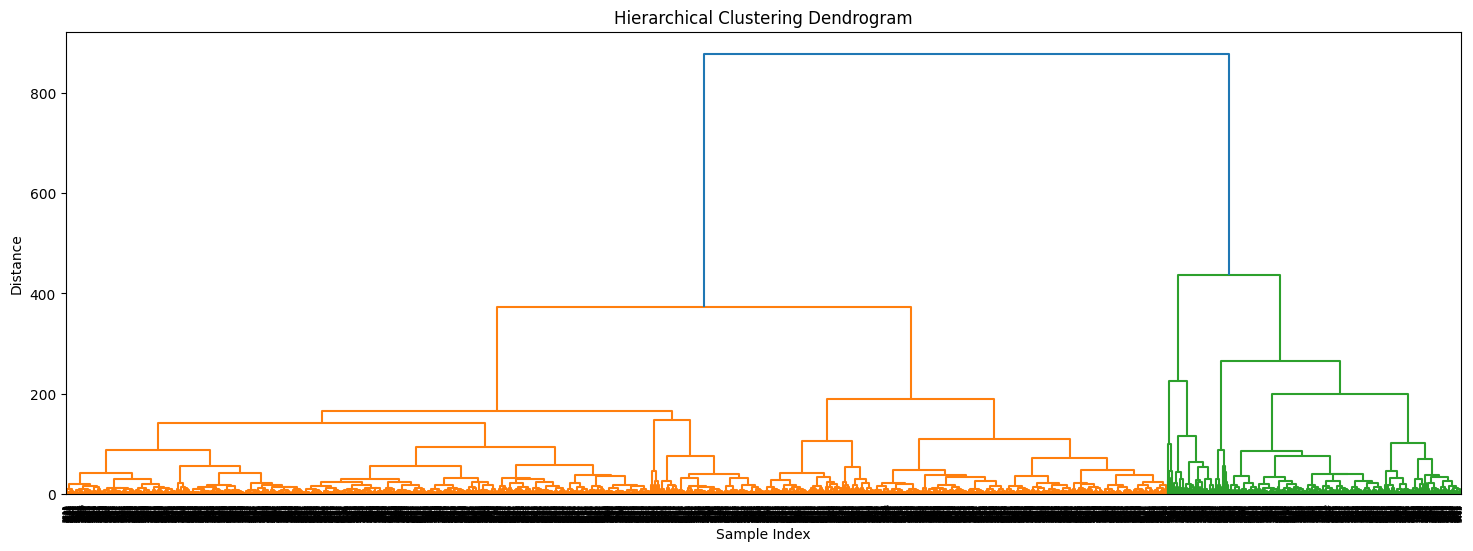

In [ ]:
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

# dendogram
plt.figure(figsize=(18, 6))
dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Among the hierarchical clustering, the one determined using the ward method for cluster aggregation looks like the most balanced one.

<font size="5"> Ward clusterings comparison:

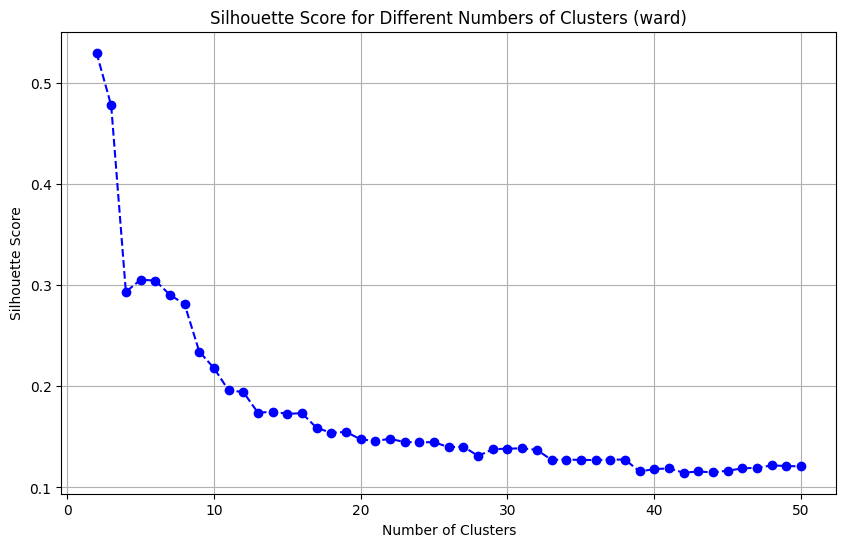

In [ ]:
cluster_range = range(2, 51)

silhouette_scores = []

# Calculate silhouette score for each number of clusters
for i in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=i, linkage='ward')
    labels = clustering.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score for Different Numbers of Clusters (ward)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Looking at the silhouette scores graph, the most appropriate number of clusters for the sake of the elaborate is either 4 or 5, with a silhouette score of alittle over 0.30. Such a score is not great in general, but given the high skewness of the data, and the presence of such a high number of outliers, it can be considered decent. Clustering of 2 and 1 groups have better scores, but it is considered a worthy move to sacrifice a contained amount of accuracy to get a more suitable number of groups to work with.

<font size="5"> K-means clustering:

It is now performed a k-means clustering method to see if better results can be achieved compared to the hierarchical clustering.

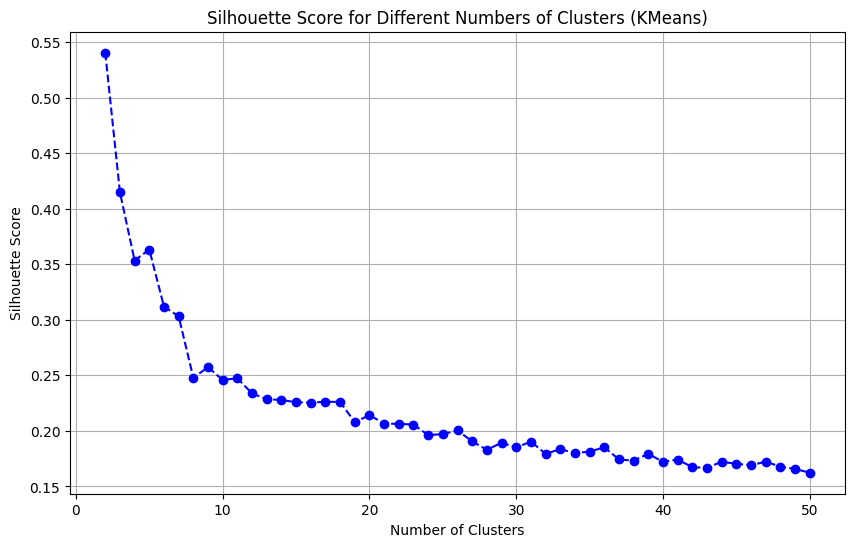

In [ ]:
cluster_range = range(2, 51)

silhouette_scores = []

# Calculate silhouette score for each number of clusters
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score for Different Numbers of Clusters (KMeans)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

The results of the k-means procedure are similar to those obtained with the hierarchical clustering. To make a choice on what procedure to use further investigation is required.

<font size="6.5"> Clustering comparison:

<font size="5"> Clusters generation:

In [ ]:
n_clusters = 4

clustering_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels1 = clustering_ward.fit_predict(X_scaled)
X1= X.copy()
X1["Cluster"] = labels1

clustering_kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels2 = clustering_kmeans.fit_predict(X_scaled)
X2= X.copy()
X2["Cluster"] = labels2

<font size="5"> Ward clusters insights:

For 4 clusters, the average silhouette score is: 0.29352206795490765


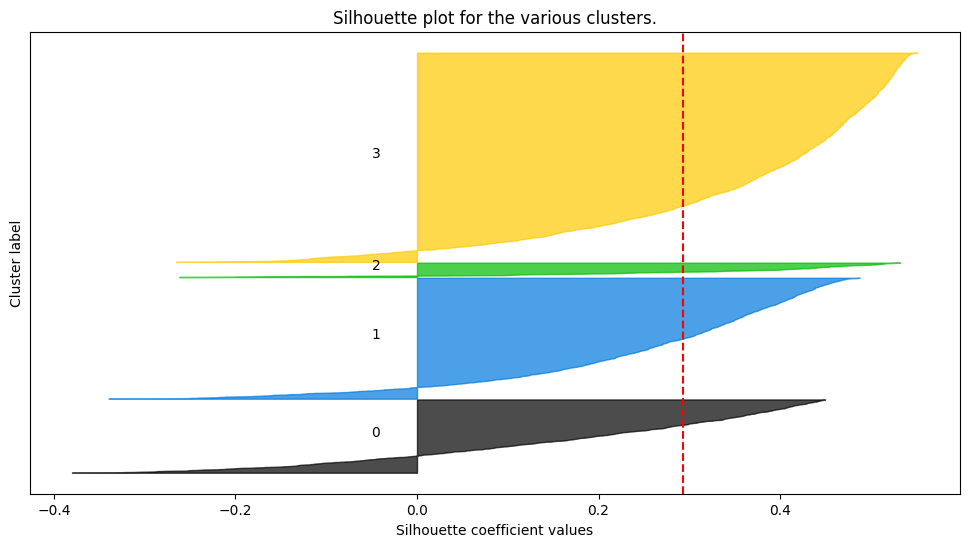

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, labels1)
print(f"For {n_clusters} clusters, the average silhouette score is: {silhouette_avg}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_scaled, labels1)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# The silhouette plot
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels1 == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters.")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])
plt.show()

<font size="5"> Kmeans clusters insights:

For 4 clusters, the average silhouette score is: 0.3532937728746478


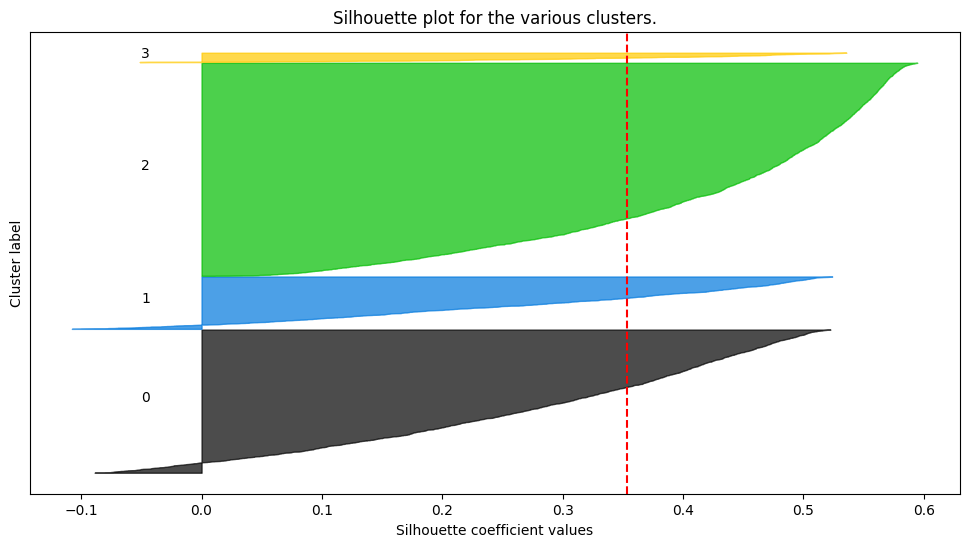

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, labels2)
print(f"For {n_clusters} clusters, the average silhouette score is: {silhouette_avg}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_scaled, labels2)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# The silhouette plot
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels2 == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters.")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])
plt.show()

<font size="5"> Comments:

The K-means clustering appears to be better than the ward hierarchical clustering method, both because the overall score is 0.06 higher, but also because in the ward clustering, a clusters experience the presence of strong below-0 values, compared to the 3 clusters experiencing them (and less intensely) of the K-means. Most properties in the clustering considered have discrete silhouette scores, which is a sign of the fact that properties are somewhat "happy" to belong to the cluster they have been assigned to.

<font size="6.5"> Analysis of the clusters:

<font size="5"> Clusters sizes:

In [ ]:
cluster_sizes = pd.Series(labels2).value_counts()
print("Cluster Sizes:\n", cluster_sizes)

Cluster Sizes:
 2    3062
0    2058
1     753
3     135
dtype: int64


Clusters vary in size, with the largest one including over 3000 properties and the smallest one counting 135.

<font size="5"> Clusters house types:

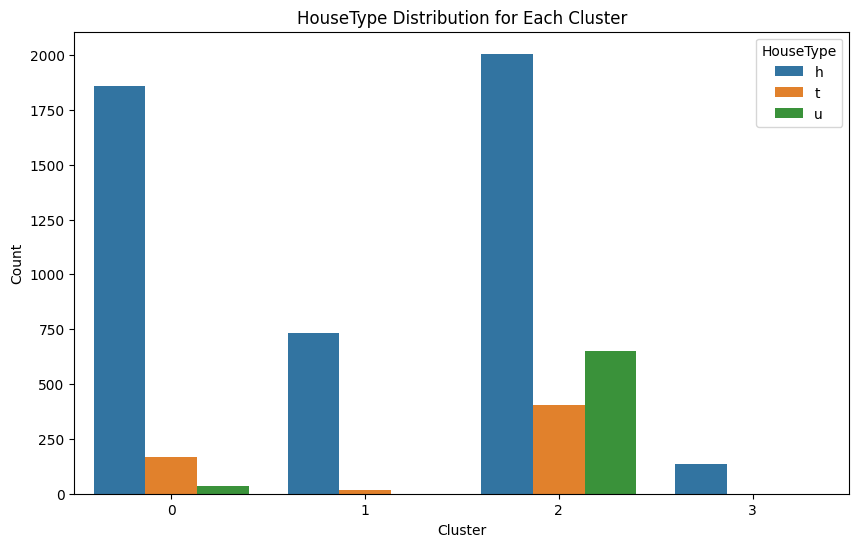

In [ ]:
X3 = df1.copy()
X3["Cluster"] = labels2
X3['Cluster'] = X3['Cluster'].astype('category')

plt.figure(figsize=(10, 6))

sns.countplot(x="Cluster", hue="HouseType", data=X3)

plt.title("HouseType Distribution for Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")

plt.show()


All clusters show a dominance of the most common house type, which is the house, additionally cluster 3 presents exclusively house type properties. Cluster 1 completely lacks units properties, the (almost) totality of which is included in cluster 2.

<font size="5"> Clusters centers:

In [ ]:
cluster_centers = pd.DataFrame(clustering_kmeans.cluster_centers_, columns=X_scaled.columns)

# inverting the personal scaling previously performed
cluster_centers["Price_(k)"] = X_scaled["Price_(k)"]/10
cluster_centers["BuildingArea"] = cluster_centers["BuildingArea"]/5
cluster_centers["Landsize"] = cluster_centers["Landsize"]/2
cluster_centers["Bedrooms"] = cluster_centers["Bedrooms"]/2

# bringing the features back to their original scale for interpretation purpouses
cluster_centers["Bedrooms"] = cluster_centers["Bedrooms"] * X["Bedrooms"].std() + X["Bedrooms"].mean()
cluster_centers["Price_(k)"] = cluster_centers["Price_(k)"] * X["Price_(k)"].std() + X["Price_(k)"].mean()
cluster_centers["DistanceCBD"] = cluster_centers["DistanceCBD"] * X["DistanceCBD"].std() + X["DistanceCBD"].mean()
cluster_centers["Bathroom"] = cluster_centers["Bathroom"] * X["Bathroom"].std() + X["Bathroom"].mean()
cluster_centers["ParkingSpot"] = cluster_centers["ParkingSpot"] * X["ParkingSpot"].std() + X["ParkingSpot"].mean()
cluster_centers["Landsize"] = cluster_centers["Landsize"] * X["Landsize"].std() + X["Landsize"].mean()
cluster_centers["BuildingArea"] = cluster_centers["BuildingArea"] * X["BuildingArea"].std() + X["BuildingArea"].mean()
cluster_centers["Propertycount"] = cluster_centers["Propertycount"] * X["Propertycount"].std() + X["Propertycount"].mean()

print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
    Bedrooms  Price_(k)  DistanceCBD  Bathroom  ParkingSpot  Landsize  \
0     3.377   1034.990        9.690     1.772        1.748   502.655   
1     3.933   1465.026        8.835     2.278        2.055   626.237   
2     2.762   1600.037       12.204     1.376        1.531   527.480   
3     4.304   1876.060        7.912     2.956        2.504   827.231   

   BuildingArea  Propertycount  
0       169.483       7118.674  
1       248.989       6928.327  
2       115.090       7441.055  
3       313.315       7549.016  


Before discussing the clusters centers, it is worth underlying that the values are brought back to the original scale, but are not to be taken as accurate esteems. Values might be biased, and what it is possible to extract from them are insights about the relationships, and their magnitude, among groups. Also, given the distortions created in the data that gave some features a larger weight, it is appropriate to discuss those features with more energy.

Cluster centers indicate the general tendencies of properties belonging to those clusters.
* **Cluster 0** includes the cheapest properties, with the smallest land size.
* **Cluster 1** properties are the closest to the CBD, yet the ones that average the least number of residences in their neighbourhoods.
* **Cluster 2** properties are relatively small properties, with the smallest average building area, number of bedrooms, bathrooms and parking spots. This is also the only group including no residence with a negative silhouette coefficient, other than the largest group
* **Cluster 3** properties are the most expensive, the biggest ones, counting the highest average number of bedrooms, bathrooms and parking spots. this is the smallest cluster, including only house type properties, probably high-end homes.

<font size="5"> Clusters distributions:

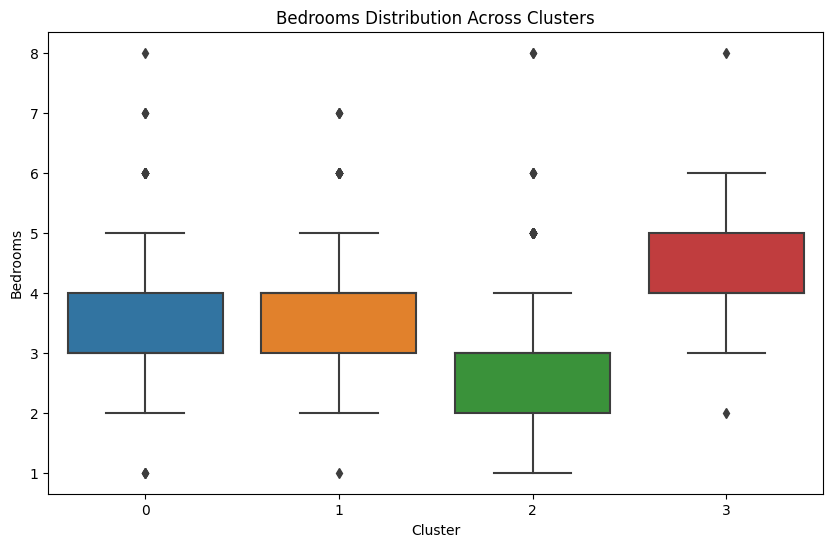

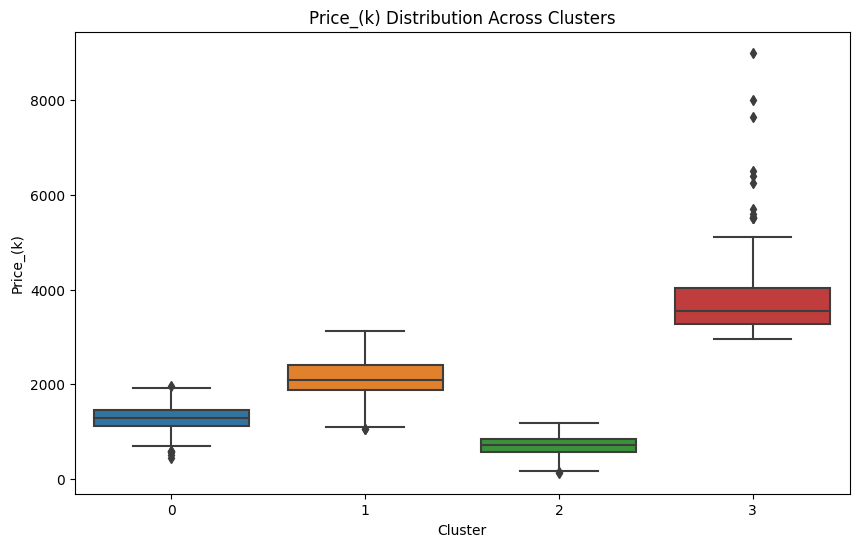

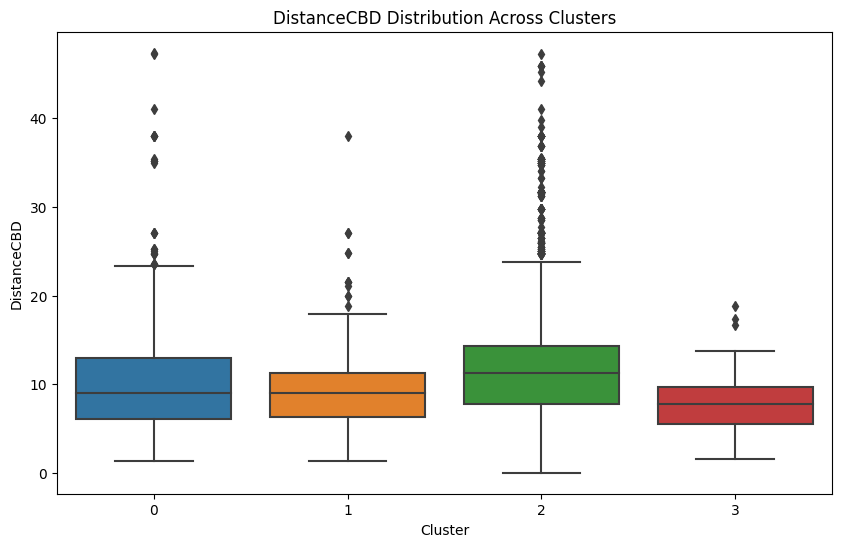

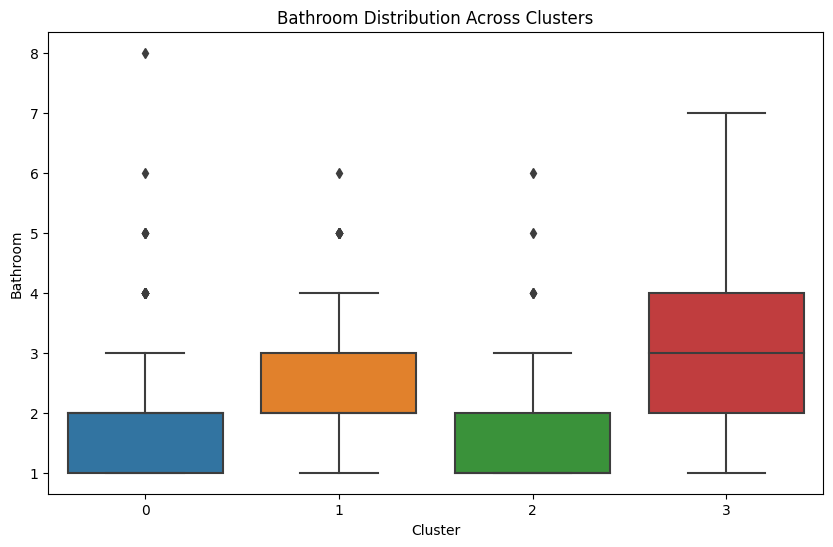

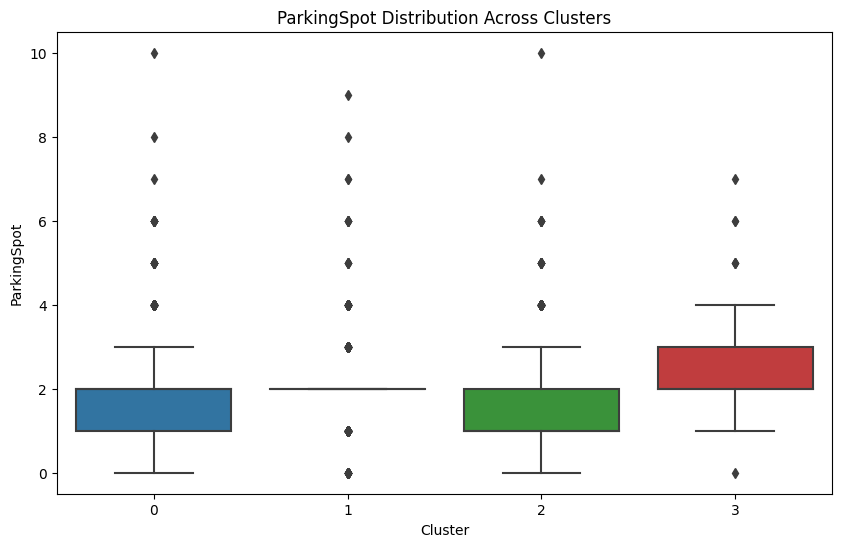

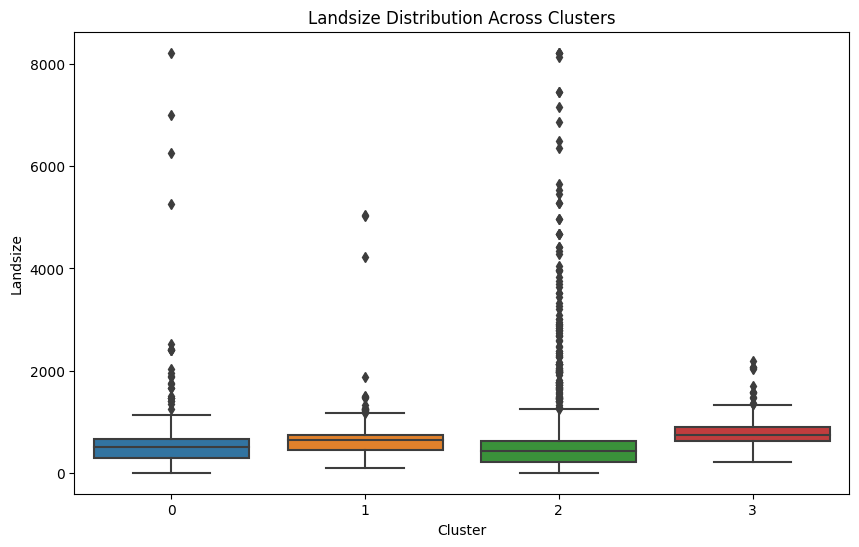

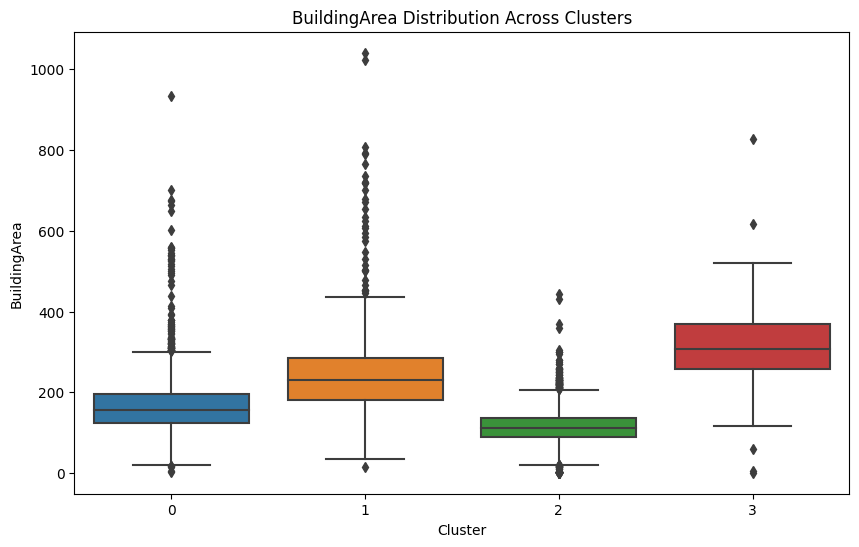

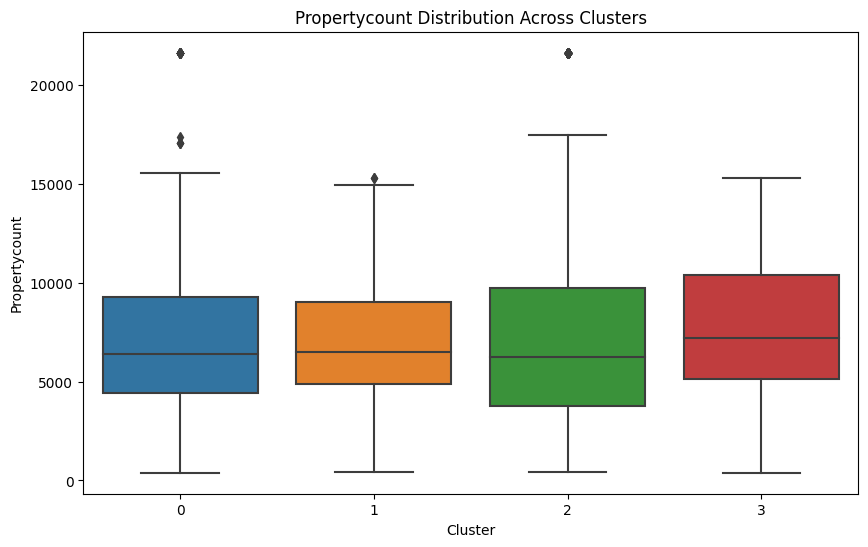

In [ ]:
for feature in X_scaled.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=X2)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.show()

Together with the silhouette coefficient, it is possible to take a look at the clusters distributions for the variables to check how cohesive they are (the tighter the better) as it means there are fewer properties different from the others in the same group. All clusters seem to have similar cohesion levels. Boxplots confirm the analysis based on clusters centers, providing the additional possibility to take a look at the distribution and outliers of each group for each feature.

<font size="6.5"> Conclusions:

* **Cluster 0** counts 2058 properties, including less expensive, and with smaller land sizes.
* **Cluster 1** counts 753 properties, including no units nor duplexes, in low-densely inhabited neighborhoods.
* **Cluster 2** is the biggest group with 3062 residences belonging to it. It includes smaller properties, that consequentially average fewer bedrooms, bathrooms, parking spots and smaller building areas.
* **Cluster 3** is the smallest group counting only 135 properties. To this cluster are assigned the highest-end, larger and more expensive properties, including only house type ones.